<a href="https://colab.research.google.com/github/rajasekart7-arch/neural_network/blob/main/Raj_ML_Insurance_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=10>Hackathon - SecureLife Insurance Brokers</center></font>
<center><font size=6>Predict Price of the Insurance charges for customers</center></font>

## Problem Statement

### Business Context

SecureLife Insurance Brokers - A digital-first insurance brokerage firm specializing in personalized health insurance solutions.

Current Challenge:
SecureLife Insurance Brokers relies on traditional actuarial tables and basic demographic data to recommend insurance coverage amounts to customers. This one-size-fits-all approach leads to:

Under-insurance: 35% of customers face financial hardship when actual medical costs exceed their coverage
Over-insurance: 28% of customers pay for excessive coverage they don't need, leading to customer dissatisfaction and churn
Competitive Disadvantage: Competitors with data-driven approaches are offering more accurate, personalized quotes

Business Opportunity:
 By developing a predictive model that accurately estimates individual healthcare costs, SecureLife can:

Recommend optimal insurance coverage amounts tailored to each customer
Reduce claim-to-premium ratios and improve profitability
Increase customer satisfaction through personalized service
Gain a competitive advantage in the digital insurance market


### Objective

As a Machine Learning Engineer at SecureLife Insurance Brokers, develop a linear regression model to predict annual healthcare costs for individual customers based on their personal characteristics and lifestyle factors.

### Specific Requirements:
Primary Goal: Predict annual medical expenses (in USD) for new insurance applicants to recommend appropriate coverage amounts
Input Features: Utilize customer data including:
Demographics (age, gender, geographic region)
Health indicators (BMI, smoking status)
Number of children
Previous healthcare utilization patterns


### Data Dictionary

- age - This contains the age of the patient
- sex - This contains the gender of the patient
- bmi - This contains the BMI of the patient
- children - This contains the number of children the patient has
- smoker - This contains if the learner is a smoker (yes/no)
- region - This contains the region in which the patient stays
- charges - This contains the medical cost incurred by the patient in a year (USD)

### Goal:

The goal is to predict the cost of medical treatment for each patient per year (in USD) using an AI Model.

Metric to Measure Performance:
The performance of your model will be evaluated using RMSE which is the square root of the average of the squared differences between predicted and actual values. The lower the RMSE the better the model.

## Installing and Importing necessary libraries

In [1]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 33.1 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpecFromSubplotSpec # Import for nested grids

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense, Dropout, BatchNormalization

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [3]:
from os import path
# uncomment and run the following lines in case Google Colab is being used
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# loading the dataset
path_train = "/content/drive/My Drive/Colab Notebooks/Hackathon - Insurance Price/Train_data_Insurance.csv"
path_test = "/content/drive/My Drive/Colab Notebooks/Hackathon - Insurance Price/Test_data_Insurance.csv"


data = pd.read_csv(path_train)
df_test= pd.read_csv(path_test)

## Data Overview

### Displaying the first few rows of the dataset

In [5]:
data.head()

customer_id  age    bmi  children      charges  sex_male  smoker_yes  \
0          561   46  19.95         2   9193.83850         0           0   
1         1286   47  24.32         0   8534.67180         0           0   
2         1143   52  24.86         0  27117.99378         0           0   
3          970   39  34.32         5   8596.82780         0           0   
4          487   54  21.47         3  12475.35130         0           0   

   region_northwest  region_southeast  region_southwest  
0                 1                 0                 0  
1                 0                 0                 0  
2                 0                 1                 0  
3                 0                 1                 0  
4                 1                 0                 0

### Checking the shape of the dataset

In [6]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 1070 rows and 10 columns.


### Checking 10 random rows of the dataset

In [7]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

customer_id  age     bmi  children      charges  sex_male  smoker_yes  \
120         1035   61  38.380         0  12950.07120         1           0   
374          105   34  27.500         1   5003.85300         0           0   
90           286   46  26.620         1   7742.10980         1           0   
844         1126   63  25.080         0  14254.60820         0           0   
649          762   23  35.200         1   2416.95500         1           0   
311          719   51  36.670         2  10848.13430         0           0   
180          243   55  26.800         1  35160.13457         0           0   
119          319   44  27.645         0   7421.19455         0           0   
49          1152   58  36.480         0  12235.83920         0           0   
101         1265   49  33.345         2  10370.91255         0           0   

     region_northwest  region_southeast  region_southwest  
120                 1                 0                 0  
374                 0                 0                 1  
90                  0                 1                 0  
844                 1                 0                 0  
649                 0                 0                 1  
311                 1                 0                 0  
180                 0                 0                 1  
119                 1                 0                 0  
49                  1                 0                 0  
101                 0                 0                 0

**Observations**


In [8]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [9]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1070 non-null   int64  
 1   age               1070 non-null   int64  
 2   bmi               1070 non-null   float64
 3   children          1070 non-null   int64  
 4   charges           1070 non-null   float64
 5   sex_male          1070 non-null   int64  
 6   smoker_yes        1070 non-null   int64  
 7   region_northwest  1070 non-null   int64  
 8   region_southeast  1070 non-null   int64  
 9   region_southwest  1070 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 83.7 KB


**Observations**

- 6 columns are of the *object* type columns and 7 columns are of *numerical* type columns


### Checking for duplicate values

In [10]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

- There are no duplicate values

### Checking for missing values

In [11]:
df.isnull().sum()

customer_id         0
age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

* No missing values

In [12]:
data.describe().T

count          mean           std        min          25%  \
customer_id       1070.0    667.579439    386.312762     1.0000   333.250000   
age               1070.0     39.357009     14.073960    18.0000    27.000000   
bmi               1070.0     30.560397      6.043386    15.9600    26.205000   
children          1070.0      1.107477      1.215983     0.0000     0.000000   
charges           1070.0  13346.089736  12019.510778  1121.8739  4897.667387   
sex_male          1070.0      0.512150      0.500086     0.0000     0.000000   
smoker_yes        1070.0      0.205607      0.404334     0.0000     0.000000   
region_northwest  1070.0      0.239252      0.426827     0.0000     0.000000   
region_southeast  1070.0      0.264486      0.441265     0.0000     0.000000   
region_southwest  1070.0      0.246729      0.431309     0.0000     0.000000   

                        50%          75%          max  
customer_id        671.0000   1003.75000   1338.00000  
age                 39.5000     51.00000     64.00000  
bmi                 30.2100     34.49625     53.13000  
children             1.0000      2.00000      5.00000  
charges           9575.4421  16746.65740  62592.87309  
sex_male             1.0000      1.00000      1.00000  
smoker_yes           0.0000      0.00000      1.00000  
region_northwest     0.0000      0.00000      1.00000  
region_southeast     0.0000      1.00000      1.00000  
region_southwest     0.0000      0.00000      1.00000

In [13]:
numeric_columns = list(data.select_dtypes(include=['int64', 'float64']))
categorical_cols = list(data.select_dtypes("object").columns)


## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **ED Functions**

In [42]:
def plot_histogram_boxplot(data, features, figsize=(16, 12), kde=False, bins=None):
    """
    Generates a grid of combined boxplots and histograms.

    data: pandas DataFrame
    features: A single column name (string) or a list of column names
    figsize: Overall size of the figure
    kde: Whether to show the density curve on histograms
    bins: Number of bins for histograms
    """
    if not isinstance(features, list):
        features = [features]

    n_features = len(features)
    n_cols = min(n_features, 3)
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    axes = np.array(axes).flatten()

    for i, feature in enumerate(features):
        current_ax = axes[i]
        current_ax.set_axis_off()

        # FIX: Use GridSpecFromSubplotSpec for a robust nested grid
        sub_gs = GridSpecFromSubplotSpec(
            2, 1,
            subplot_spec=current_ax.get_subplotspec(),
            height_ratios=[0.25, 0.75],
            hspace=0
        )

        ax_box = fig.add_subplot(sub_gs[0])
        ax_hist = fig.add_subplot(sub_gs[1], sharex=ax_box)

        plt.setp(ax_box.get_xticklabels(), visible=False)

        # Plotting
        sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color="violet")
        ax_box.set_xlabel('')
        ax_box.set_title(f'Distribution of {feature}', weight='bold')

        plot_params = {'data': data, 'x': feature, 'kde': kde, 'ax': ax_hist}
        if bins:
            sns.histplot(**plot_params, bins=bins)
        else:
            sns.histplot(**plot_params)

        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label=f"Mean: {data[feature].mean():.2f}")
        ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label=f"Median: {data[feature].median():.2f}")
        ax_hist.legend(loc="upper right")

    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_axis_off()

    plt.show()

In [43]:
def show_pairplot(data, diag_kind = 'kde', height = 2, hue = None):
  '''
  Description: Function to plot a barplot with labeled percentage or count
  Parameters:
    data: pandas.core.frame.DataFrame, required
      The DataFrame of the two-dimensional tabular data
    diag_kind: str, optional
      The type of pairplot diagram, default: kde
    height: int, optional
      The plot size in inches, default: 2
    hue: str, optional
      To show the hue, default: None
  '''
  if hue:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height, hue = hue)
    ax.fig.suptitle('Relationship of Numerical Variables with regards to ' + hue, y = 1.005, size = 11)
  else:
    ax = sns.pairplot(data = data, diag_kind = 'kde', height = height)
    ax.fig.suptitle('Relationship of Numerical Variables', y = 1.005, size = 11)

  plt.show()


In [44]:
def plot_labeled_barplots(data, features, perc=False, n=None, figsize=(20, 15)):
    """
    Generates a grid of bar plots with labels.

    data: pandas DataFrame
    features: A single column name (string) or a list of column names
    perc: Whether to display percentages instead of count (default is False)
    n: Displays the top n category levels (default is None, i.e., display all levels)
    figsize: Overall size of the figure for the grid
    """
    # Ensure 'features' is a list for consistent iteration
    if not isinstance(features, list):
        features = [features]

    # Calculate grid dimensions
    n_features = len(features)
    n_cols = min(n_features, 3)  # Max 3 columns for readability
    n_rows = int(np.ceil(n_features / n_cols))

    # Create the main figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, constrained_layout=True)
    axes = np.array(axes).flatten()

    # Loop through each feature
    for i, feature in enumerate(features):
        ax = axes[i]
        total = len(data[feature])

        # Create the bar plot on the specified axis
        sns.countplot(
            data=data,
            x=feature,
            palette="Paired",
            order=data[feature].value_counts().index[:n],
            ax=ax,
        )

        ax.set_title(f"Distribution of {feature}", weight="bold")
        ax.tick_params(axis='x', labelrotation=90) # Rotate x-axis labels

        # Annotate each bar with count or percentage
        for p in ax.patches:
            if perc:
                label = f"{100 * p.get_height() / total:.1f}%"
            else:
                label = f"{p.get_height()}"

            ax.annotate(
                label,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="center",
                size=11,
                xytext=(0, 5),
                textcoords="offset points",
            )

    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        axes[i].set_axis_off()

    plt.show()

In [45]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [46]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

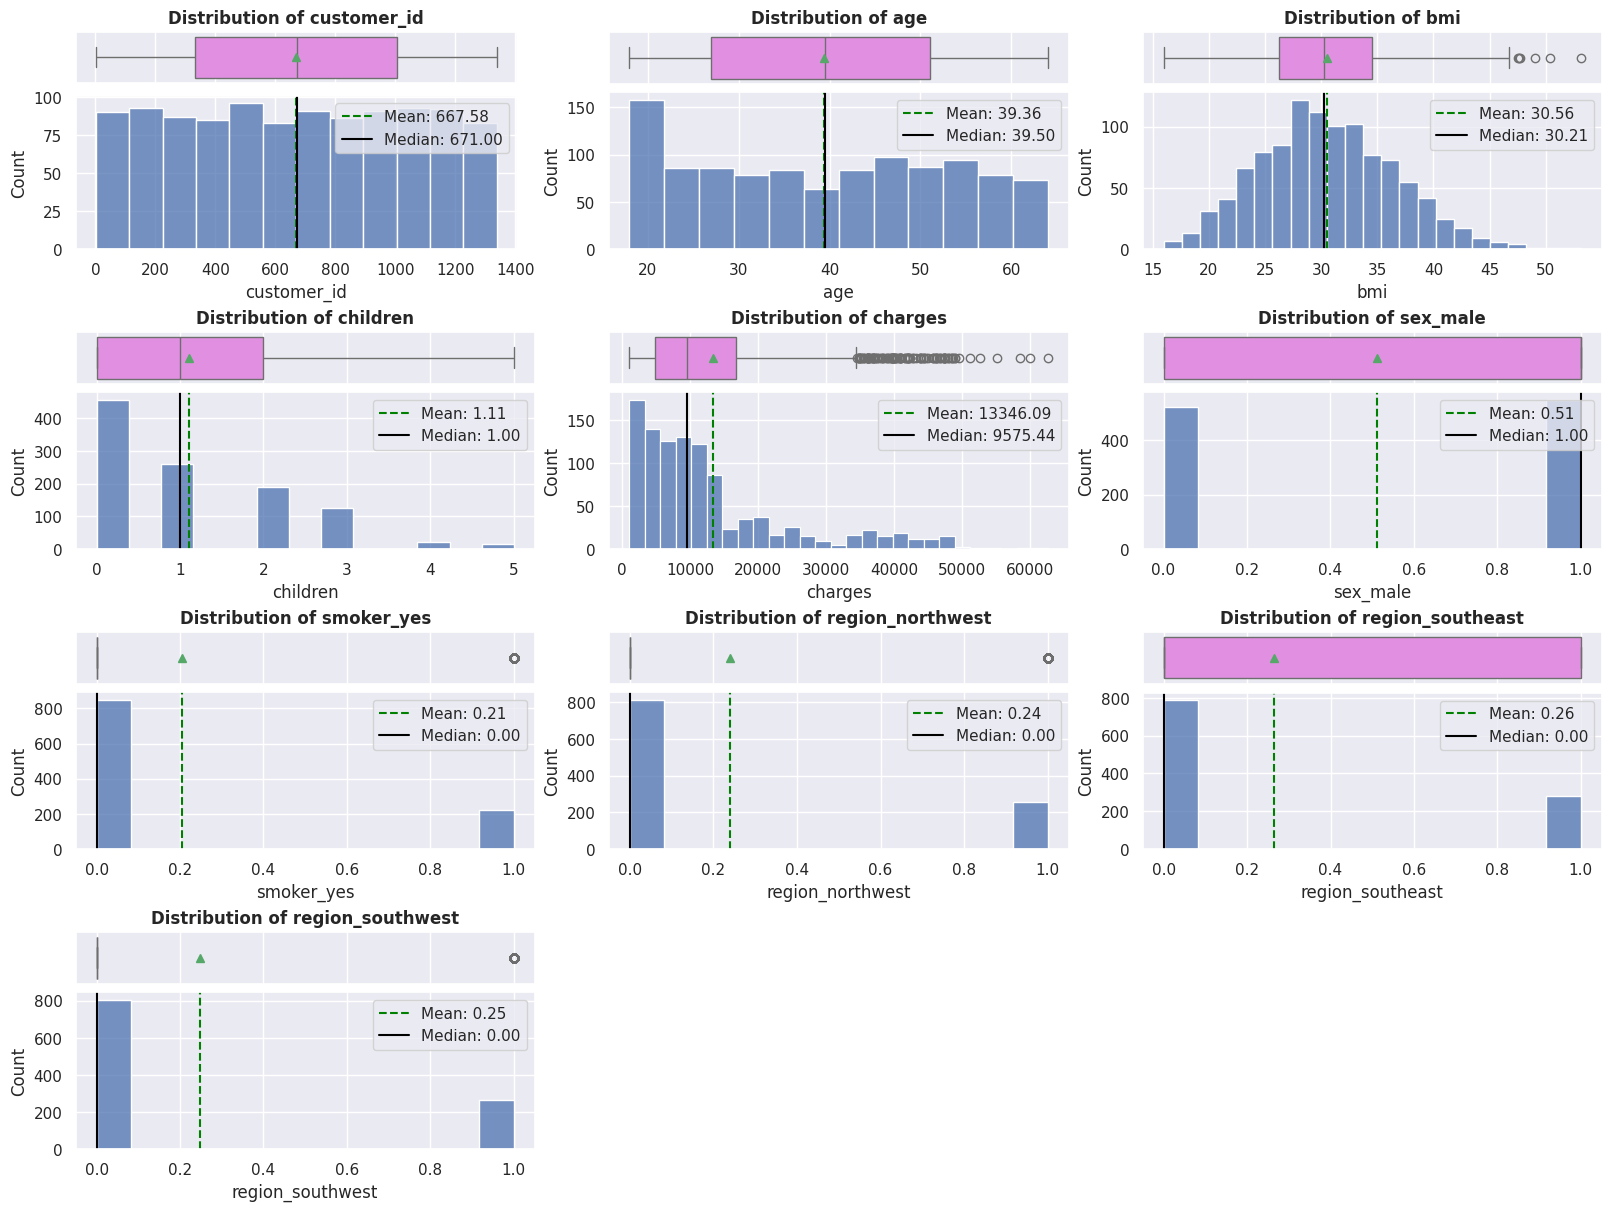

In [51]:
# outlier detection using boxplot
plot_histogram_boxplot(data, numeric_columns)

**Observation**

* As highlighted no_of_employees follows right skewed distribution, while no_of_employees has a high deviation and has a huge outlier
* prevailing_wages follows a normal distribution where the mean is close to the 50% percentile
* yr_of_estab is following left skewed distribution

In [59]:
for item in numeric_columns:
  print(100*data[item].value_counts(dropna = False)/data[item].shape[0])
  print('-' * 50)

customer_id
1127    0.093458
561     0.093458
1286    0.093458
1143    0.093458
970     0.093458
          ...   
148     0.093458
11      0.093458
1208    0.093458
317     0.093458
933     0.093458
Name: count, Length: 1070, dtype: float64
--------------------------------------------------
age
18    5.700935
19    4.859813
48    2.523364
24    2.429907
45    2.336449
54    2.336449
46    2.242991
50    2.242991
27    2.242991
20    2.242991
55    2.242991
51    2.149533
53    2.149533
56    2.056075
37    2.056075
38    2.056075
41    2.056075
29    2.056075
44    2.056075
42    2.056075
33    1.962617
23    1.962617
34    1.962617
47    1.962617
52    1.962617
28    1.962617
58    1.962617
40    1.962617
39    1.962617
36    1.962617
21    1.962617
57    1.962617
31    1.869159
61    1.869159
35    1.869159
32    1.869159
25    1.869159
59    1.869159
49    1.775701
22    1.775701
26    1.775701
43    1.682243
63    1.682243
62    1.682243
64    1.588785
30    1.588785
60    1.588785

Text(0.5, 1.0, "Boxplot for ['customer_id', 'age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']")

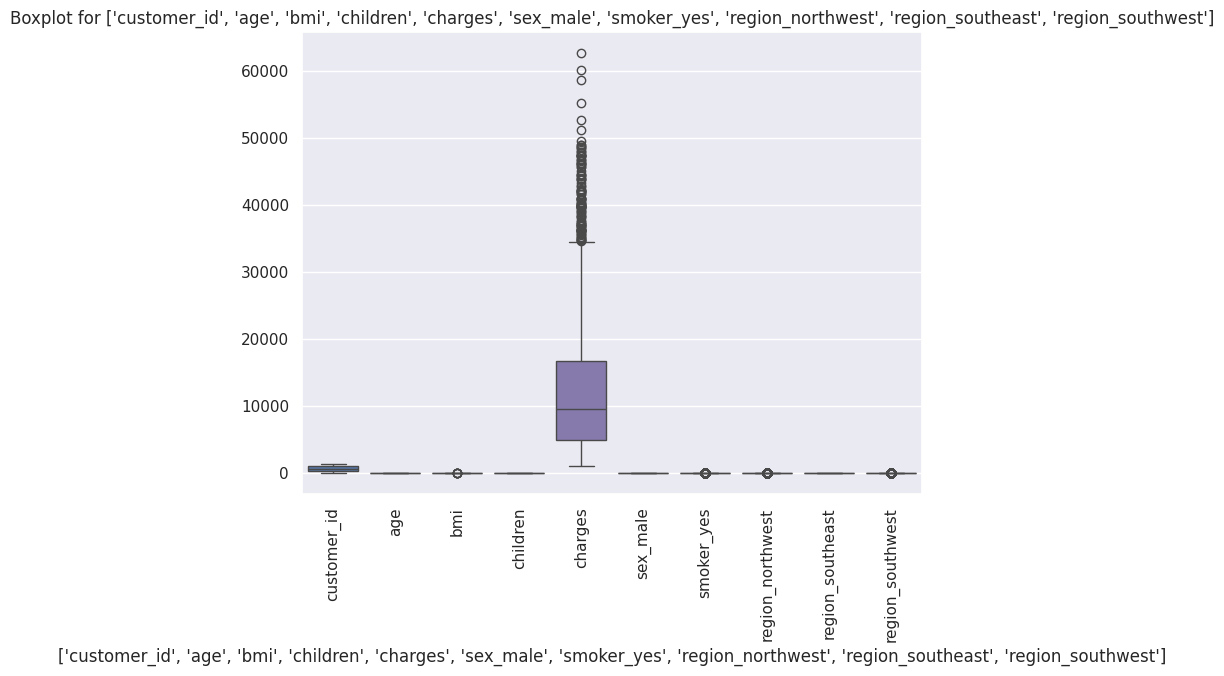

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[numeric_columns])
plt.xlabel(numeric_columns)
plt.xticks(rotation=90)
plt.title(f'Boxplot for {numeric_columns}')

**Observation:**
* Prevailing wages has high medium when compared to other two numeric columns

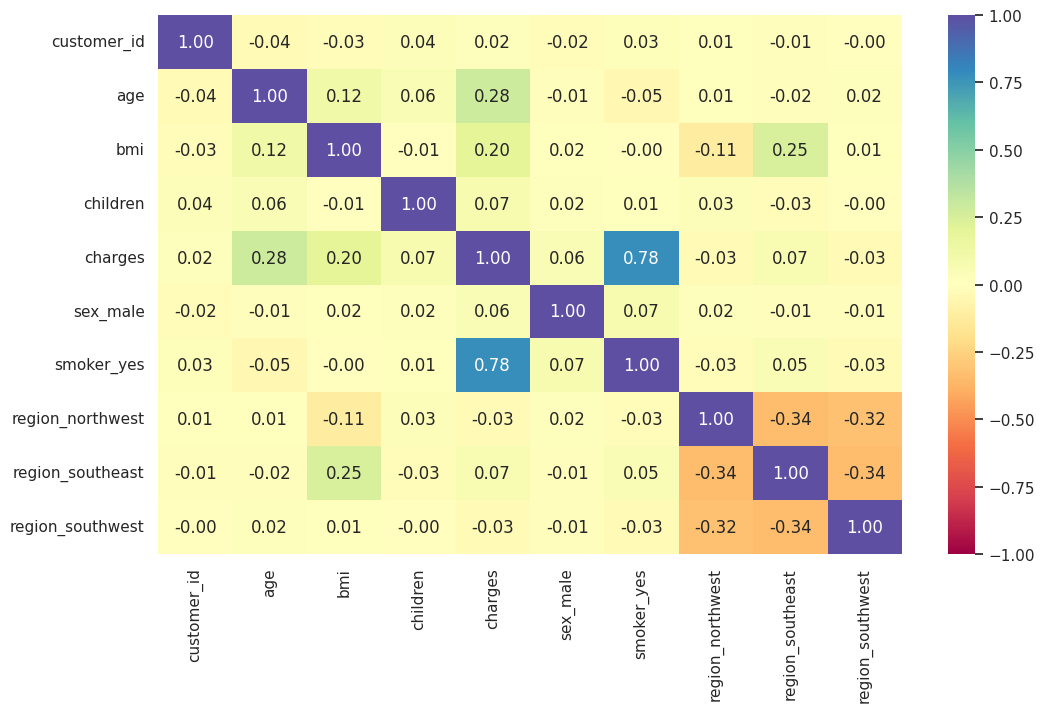

In [55]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**
* The correlation indicates a very weak relationship between all the numeric variables

### Bivariate Analysis

In [57]:
target = 'charges'

In [ ]:
# Display the relationships of Numerical Variables with regards to Personal_Loan

show_pairplot(data = data[numeric_columns], hue = target)

**Observations:**
* As highlighted earlier, the correlation is very weak and also, the case_status is distributed


**Let's see how the target variable varies across main columns**

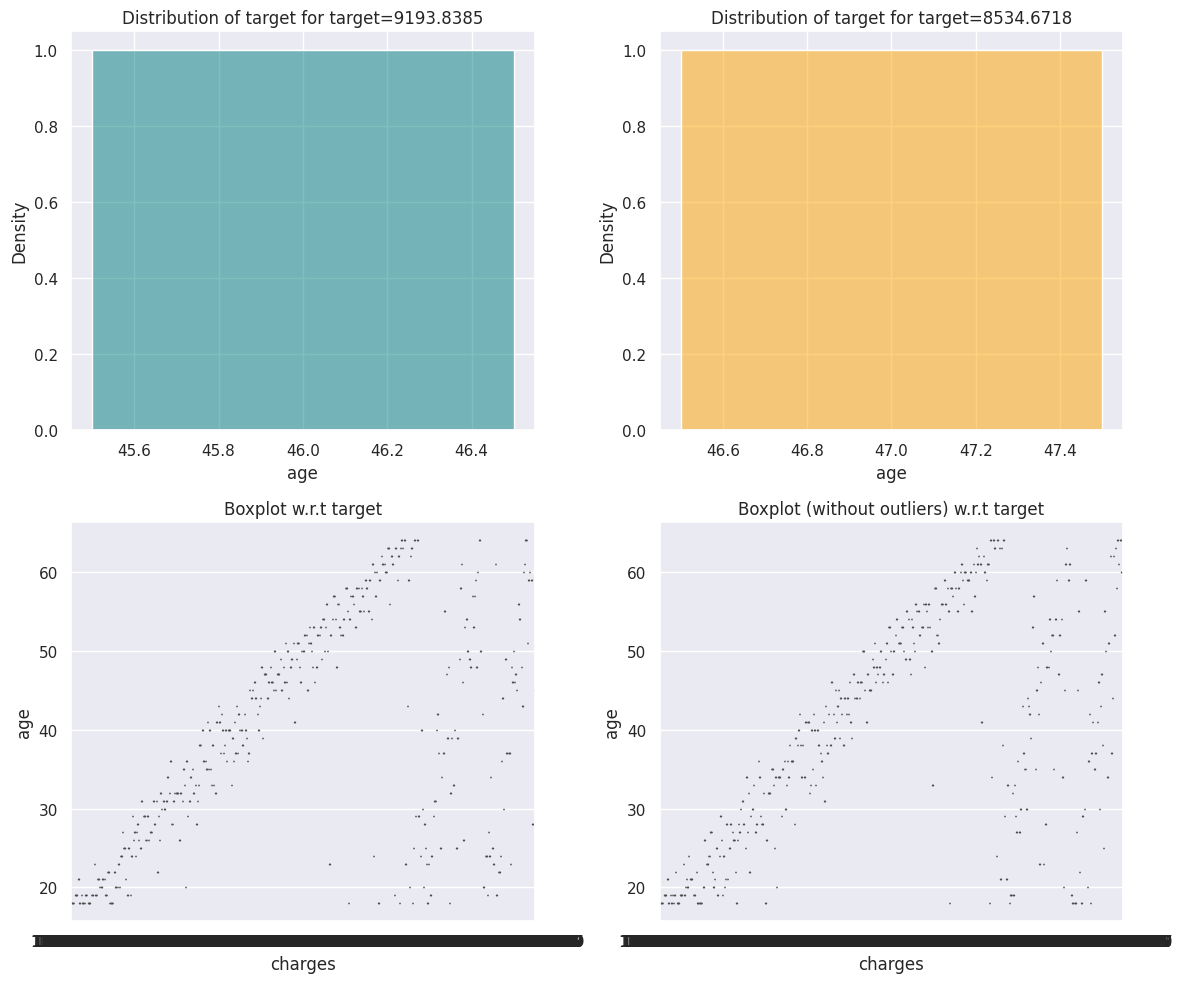

KeyboardInterrupt: 

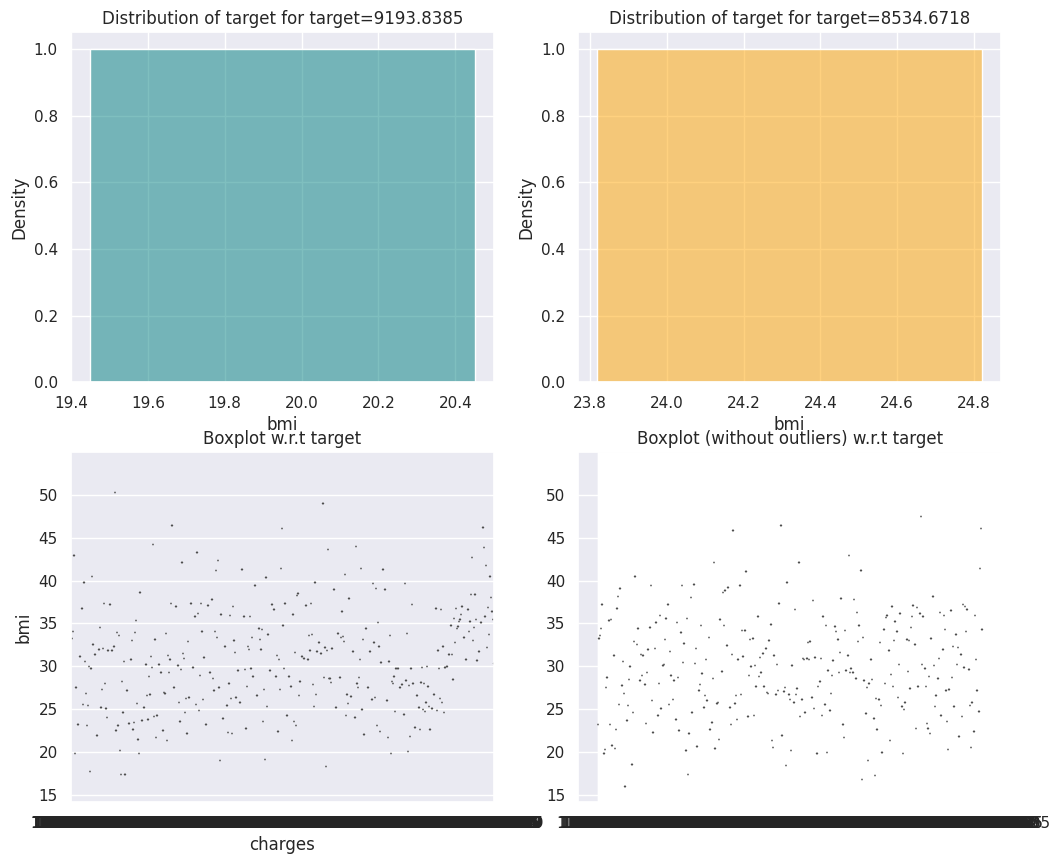

In [61]:
for i in numeric_columns:
  if i != target and i!= 'customer_id':
    distribution_plot_wrt_target(data, i, target)

**Observation:**
* The median wage for the certified applications is slightly higher than the denied application, but is the prevailing wage similar across all region.

**Observation:**
* Not much outstanding insights out of this, everything is distributed
* Lets do the cross analysis between numeric and object columns

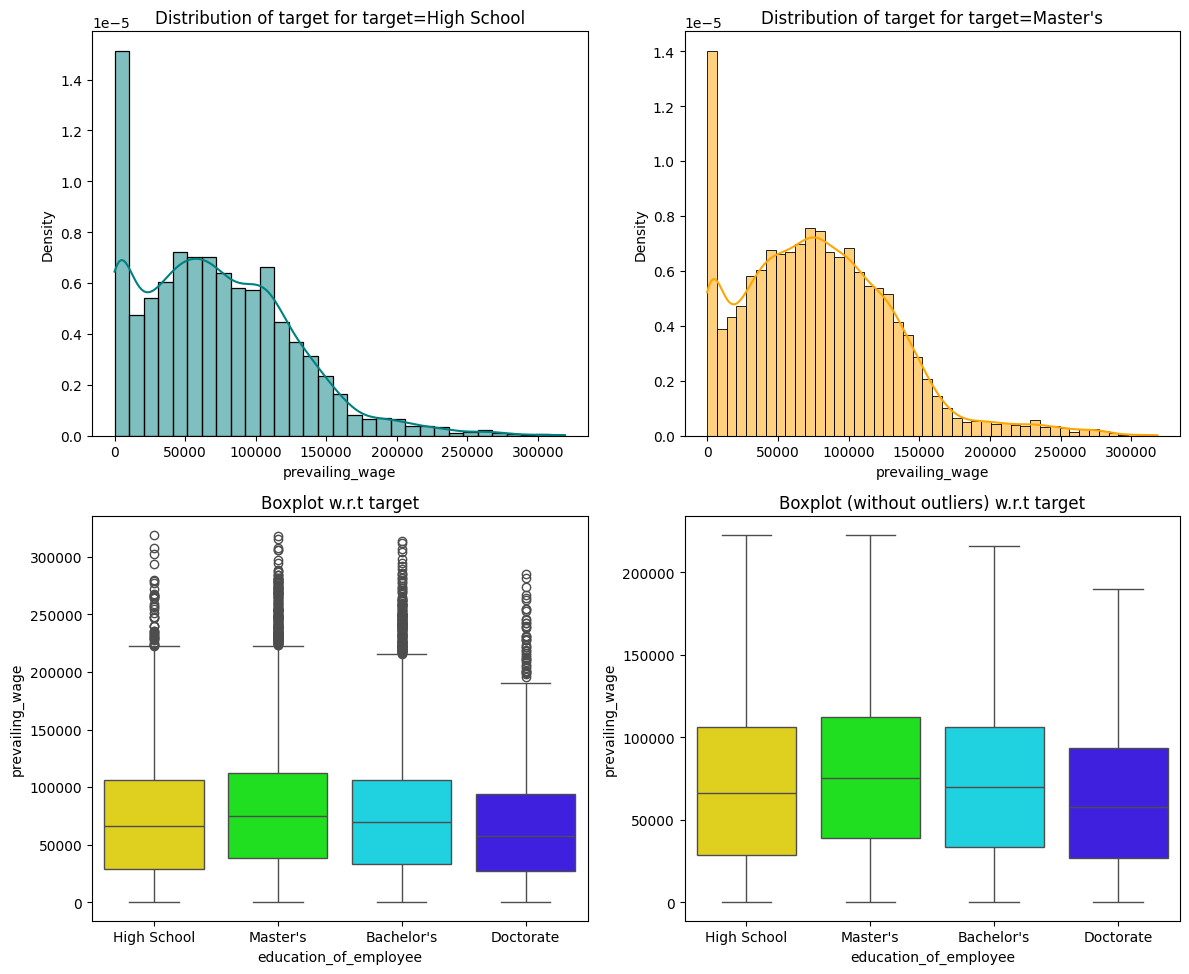

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'education_of_employee')

**Observation:**
* Surprisingly, doctorate holders show a lower median prevailing wage than high school graduates; we’ll examine whether differences in work experience or required on-the-job training explain this.
* Master’s and bachelor’s degree holders have very similar prevailing wages.
High school graduates earn slightly less than those with bachelor’s or master’s degrees.
* The dataset excludes certifications and specialized roles, which could influence prevailing wages for workers with only a high school diploma.

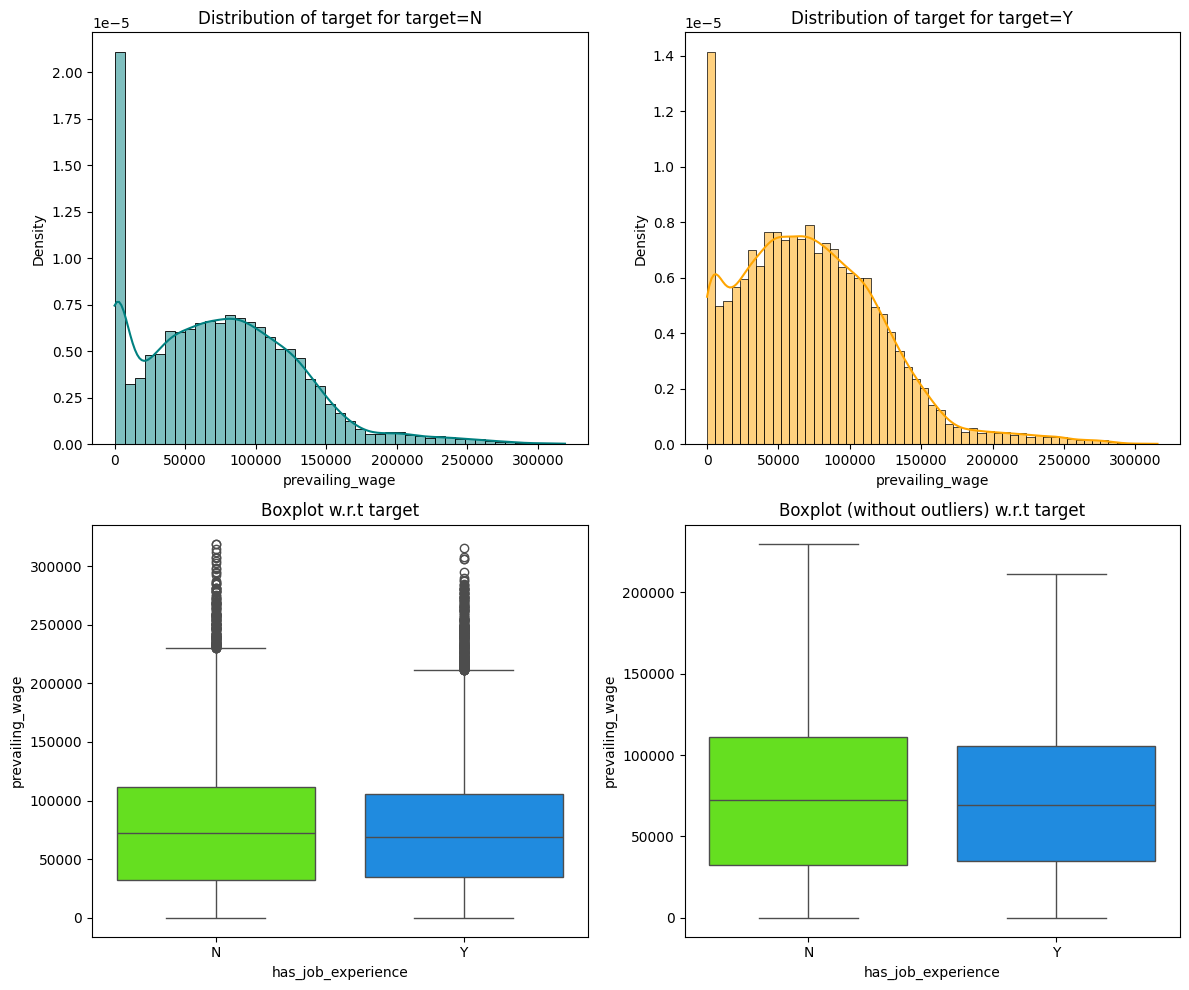

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'has_job_experience')

**Observation:**
* There seems to be a higher prevailing wage for workers with no work experience.

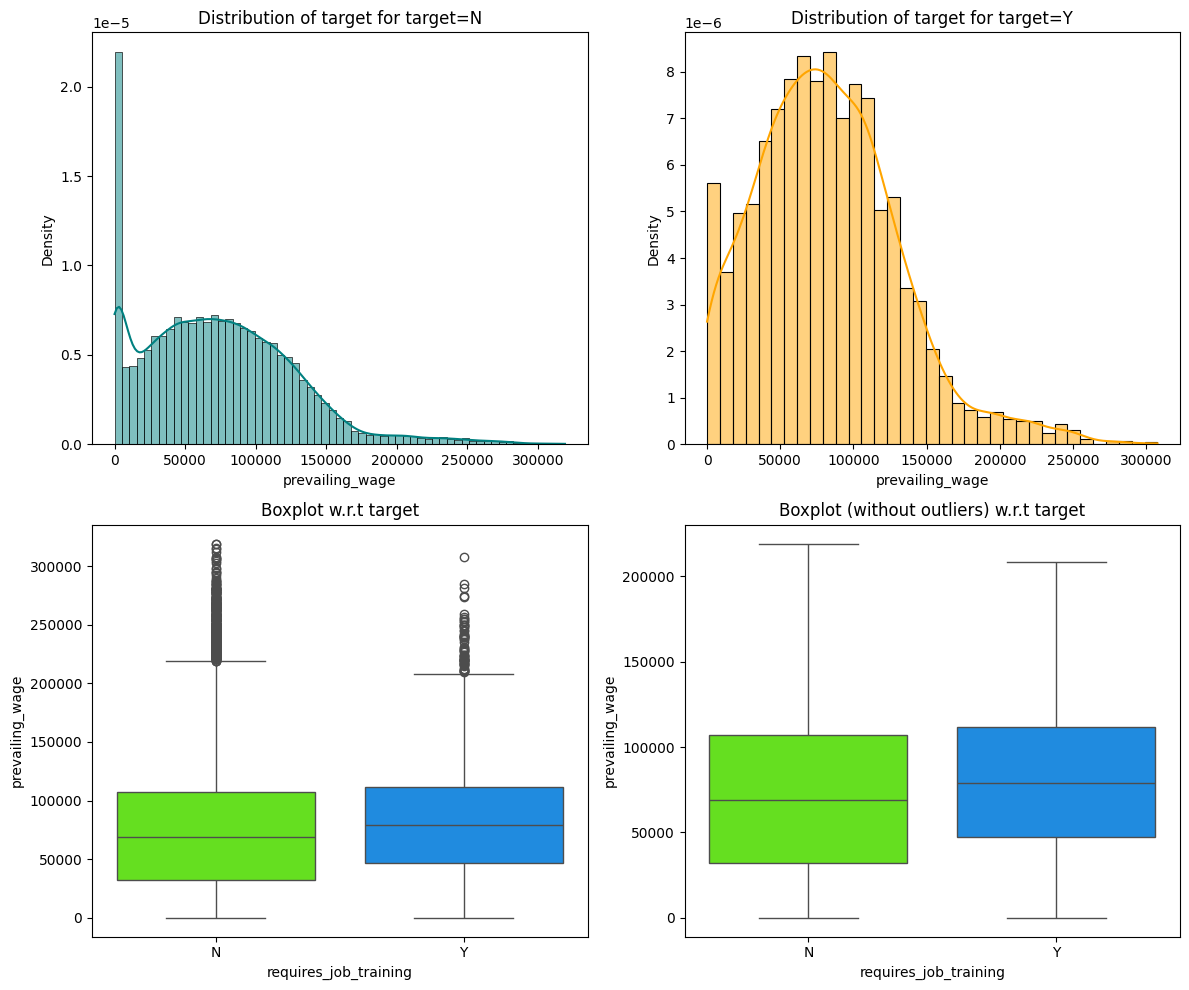

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'requires_job_training')

**Observation:**
* Workers that require job training have a slightly higher prevailing wage median.
* There are also less outliers for workers that require job training.
* This makes sense as job training especializes a worker more, having a higher value for the companies.

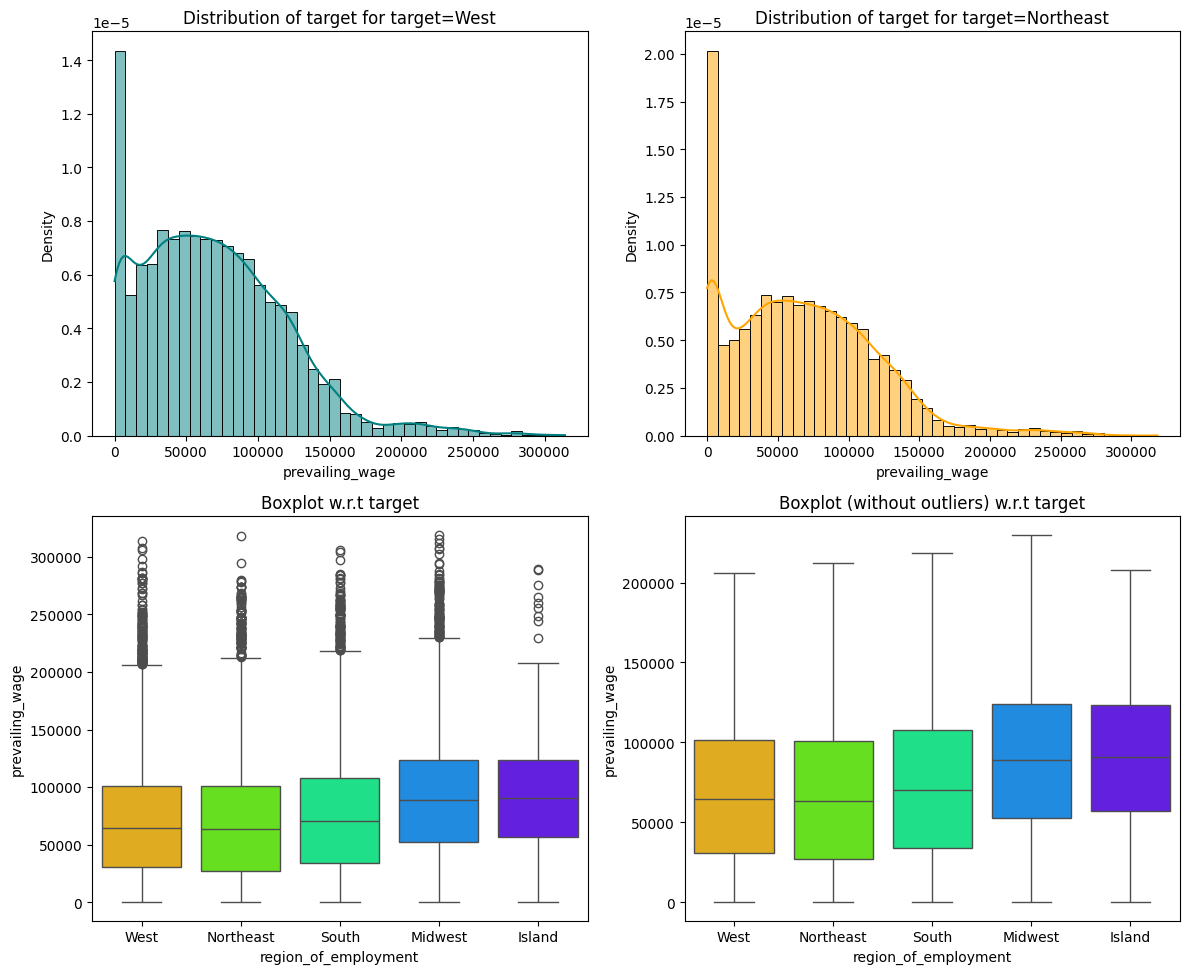

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'region_of_employment')

**Observation:**
* Midwest and inland have slightly higher median wages compared to other regions

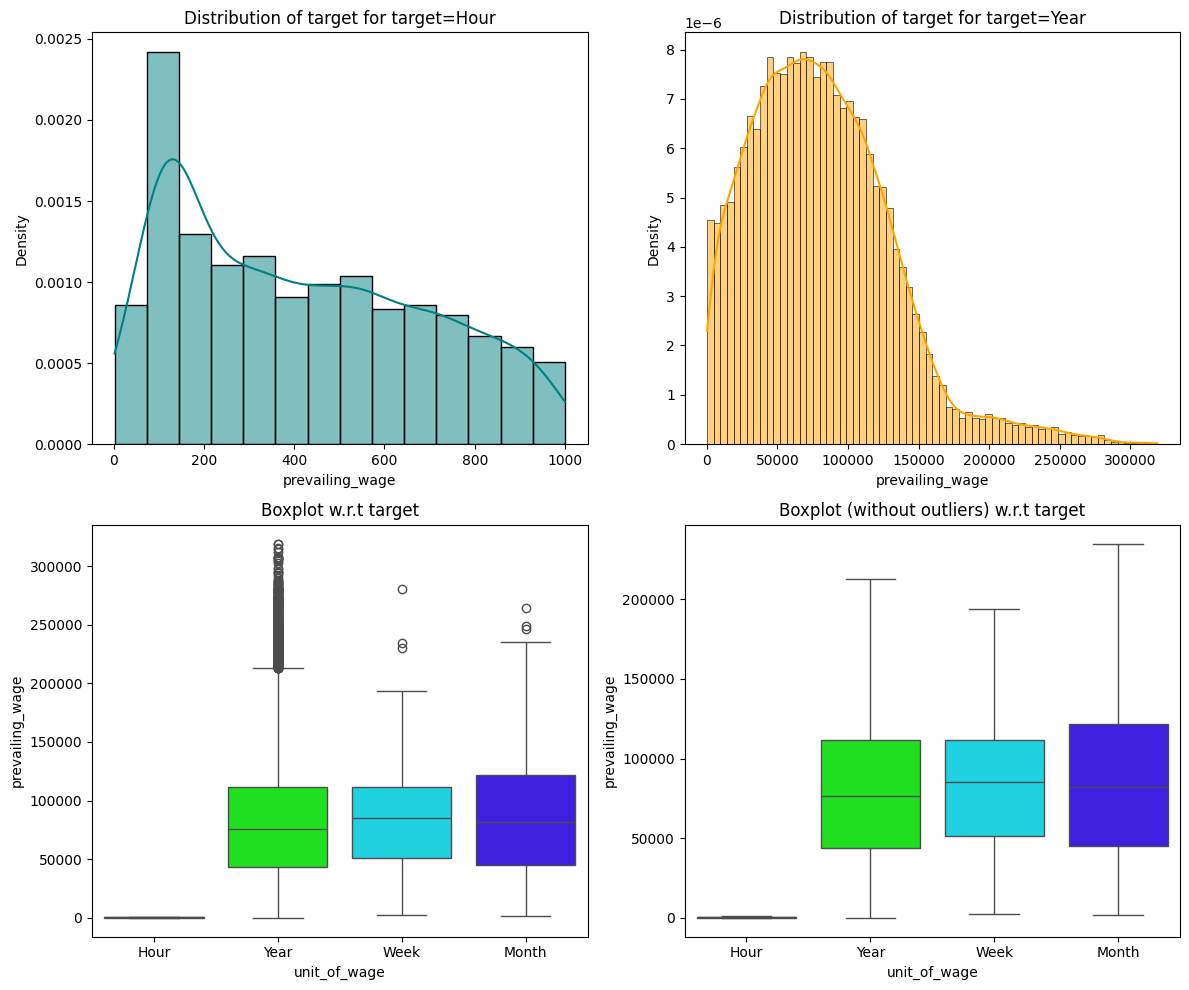

In [ ]:
distribution_plot_wrt_target(data,'prevailing_wage', 'unit_of_wage')

**Observation:**
* It's surprising that all units of wage are close to 0.
* However, they are all above 0 which could be possible that the values are true.
* We will leave the prevailing wage as is since we don't know exactly how it was calculated. After comparing prevailing wage with other variables, it doesn't seem necessary to modify the variable.

## Data Preprocessing

### Train Test Split

In [324]:
df1=df.copy()

# Define the columns to scale
num_columns = ["age","bmi","children","charges"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(df1[num_columns])

StandardScaler()

In [323]:
df2=df_test.copy()

# Define the columns to scale
num_columns_test = ["age","bmi","children"]

# Initialize the StandardScaler
scaler_test = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler_test.fit(df2[num_columns_test])

StandardScaler()

In [325]:
df1[num_columns] = scaler.transform(df1[num_columns])
df2[num_columns_test] = scaler_test.transform(df2[num_columns_test])

In [25]:
df1.describe()

customer_id           age           bmi      children       charges  \
count  1070.000000  1.070000e+03  1.070000e+03  1.070000e+03  1.070000e+03   
mean    667.579439 -1.992176e-16 -4.648410e-17 -2.324205e-17  7.304645e-17   
std     386.312762  1.000468e+00  1.000468e+00  1.000468e+00  1.000468e+00   
min       1.000000 -1.518194e+00 -2.417060e+00 -9.111921e-01 -1.017507e+00   
25%     333.250000 -8.784157e-01 -7.210253e-01 -9.111921e-01 -7.032210e-01   
50%     671.000000  1.016470e-02 -5.800739e-02 -8.842793e-02 -3.138573e-01   
75%    1003.750000  8.276587e-01  6.515707e-01  7.343363e-01  2.830529e-01   
max    1338.000000  1.751782e+00  3.736342e+00  3.202629e+00  4.099153e+00   

          sex_male   smoker_yes  region_northwest  region_southeast  \
count  1070.000000  1070.000000       1070.000000       1070.000000   
mean      0.512150     0.205607          0.239252          0.264486   
std       0.500086     0.404334          0.426827          0.441265   
min       0.000000     0.000000          0.000000          0.000000   
25%       0.000000     0.000000          0.000000          0.000000   
50%       1.000000     0.000000          0.000000          0.000000   
75%       1.000000     0.000000          0.000000          1.000000   
max       1.000000     1.000000          1.000000          1.000000   

       region_southwest  
count       1070.000000  
mean           0.246729  
std            0.431309  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

In [26]:
df2.describe()


customer_id           age           bmi      children    sex_male  \
count   268.000000  2.680000e+02  2.680000e+02  2.680000e+02  268.000000   
mean    677.167910  5.633968e-17 -1.955318e-16  7.953837e-17    0.477612   
std     387.334352  1.001871e+00  1.001871e+00  1.001871e+00    0.500433   
min      24.000000 -1.478590e+00 -2.265132e+00 -8.996196e-01    0.000000   
25%     350.000000 -9.046091e-01 -6.994735e-01 -8.996196e-01    0.000000   
50%     665.500000 -4.363755e-02 -4.680129e-02 -3.855512e-02    0.000000   
75%    1004.000000  8.173340e-01  6.553128e-01  8.225093e-01    1.000000   
max    1328.000000  1.821801e+00  3.416114e+00  3.405703e+00    1.000000   

       smoker_yes  region_northwest  region_southeast  region_southwest  
count  268.000000        268.000000        268.000000        268.000000  
mean     0.201493          0.257463          0.302239          0.227612  
std      0.401866          0.438054          0.460087          0.420075  
min      0.000000          0.000000          0.000000          0.000000  
25%      0.000000          0.000000          0.000000          0.000000  
50%      0.000000          0.000000          0.000000          0.000000  
75%      0.000000          1.000000          1.000000          0.000000  
max      1.000000          1.000000          1.000000          1.000000

In [27]:
# defining the dependent and independent variables
X = df1.drop(["charges"], axis=1)
y = df1["charges"]

In [28]:
# splitting the data in 80:20 ratio for train and temporary data
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=1)

In [29]:
x_train.drop(['customer_id'],axis=1,inplace=True)
x_val.drop(['customer_id'],axis=1,inplace=True)

In [30]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in validation data =", x_val.shape[0])

Number of rows in train data = 749
Number of rows in validation data = 321


### Normalizing the numerical variables

* Once the scaler object fits on the data using the `fit()` method, it stores the parameters (mean and standard deviation) for normalization based on the training data

* We then use these parameters to normalize the validation and test data

* This is similar to what we did in the Missing Value Treatment section.
    - The only difference is that there we had to explicitly store the parameters (median values), while here it is done implicitly by sklearn in this case

In [31]:
x_train.head()

age       bmi  children  sex_male  smoker_yes  region_northwest  \
823 -0.807329  0.052082 -0.911192         1           0                 1   
187  0.756572  0.067809  1.557100         1           0                 1   
894  1.467437 -1.080263 -0.911192         0           0                 1   
16  -0.238638  0.470089  0.734336         1           1                 0   
941  0.969832  0.586800 -0.911192         1           1                 0   

     region_southeast  region_southwest  
823                 0                 0  
187                 0                 0  
894                 0                 0  
16                  0                 1  
941                 0                 0

In [32]:
x_train.describe()

age         bmi    children    sex_male  smoker_yes  \
count  749.000000  749.000000  749.000000  749.000000  749.000000   
mean    -0.002221    0.019740    0.022519    0.526035    0.210948   
std      0.988257    0.992974    1.002896    0.499655    0.408254   
min     -1.518194   -2.417060   -0.911192    0.000000    0.000000   
25%     -0.878416   -0.687088   -0.911192    0.000000    0.000000   
50%     -0.025379   -0.010826   -0.088428    1.000000    0.000000   
75%      0.827659    0.635637    0.734336    1.000000    0.000000   
max      1.751782    3.736342    3.202629    1.000000    1.000000   

       region_northwest  region_southeast  region_southwest  
count        749.000000        749.000000        749.000000  
mean           0.226969          0.268358          0.253672  
std            0.419152          0.443401          0.435403  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000  
75%            0.000000          1.000000          1.000000  
max            1.000000          1.000000          1.000000

In [33]:
y_train.describe()

count    749.000000
mean       0.016489
std        1.018494
min       -1.017507
25%       -0.694472
50%       -0.316666
75%        0.334253
max        4.099153
Name: charges, dtype: float64

### Utility functions

In [34]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [35]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a neural network model
def model_performance(model,predictors,target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors).reshape(-1)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf =  {
            "RMSE": [rmse],
            "MAE": [mae],
            "R-squared": [r2],
            "Adj. R-squared": [adjr2],
            "MAPE": [mape]}

    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_R-squared","Valid_R-squared"]

results = pd.DataFrame(columns=columns)

## Model building

We'll use $R^2$ as our metric of choice for the model to optimize.

In [291]:
#Defining the list of metrics to be used for all the models.
metrics = [tf.keras.metrics.R2Score(name="r2_score")]

### Model 0

- We will start off with a simple neural network with
  - No Hidden layers
  - Gradient descent as the optimization algorithm.

In [37]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [38]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [41]:
epochs = 10
batch_size = x_train.shape[0]

In [42]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - loss: 1.9810 - r2_score: -0.9122 - val_loss: 2.0203 - val_r2_score: -1.2104
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - loss: 1.9309 - r2_score: -0.8639 - val_loss: 1.9669 - val_r2_score: -1.1519
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 1.8829 - r2_score: -0.8176 - val_loss: 1.9156 - val_r2_score: -1.0958
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 1.8368 - r2_score: -0.7731 - val_loss: 1.8663 - val_r2_score: -1.0419
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 1.7925 - r2_score: -0.7303 - val_loss: 1.8190 - val_r2_score: -0.9901
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 1.7500 - r2_score: -0.6892 - val_loss: 1.7736 - val_r2_score: -0.9404
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 1.7091 - r2_score: -0.6498 - val_loss: 1.7299 - val_r2_score: -0.8926
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 1.6698 - r2_score: -0.6119 - val_loss: 1.6879 

In [43]:
print("Time taken in seconds ",end-start)

Time taken in seconds  2.657188653945923


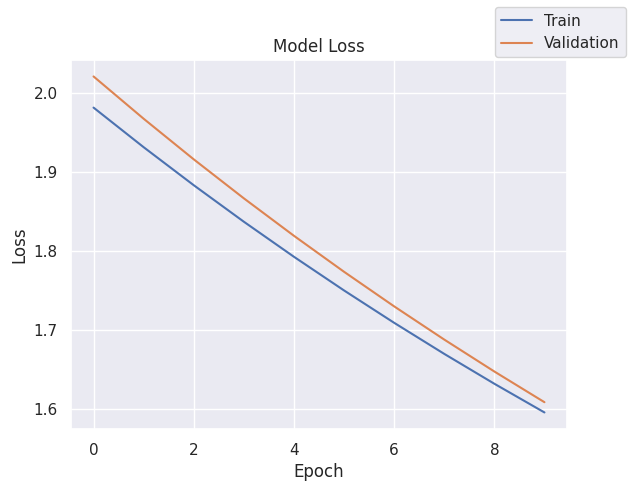

In [44]:
plot(history,'loss')

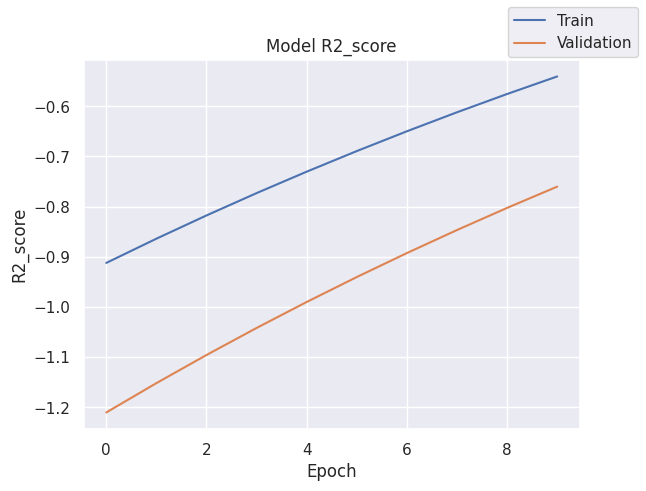

In [45]:
plot(history,'r2_score')

In [46]:
results.loc[0]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [47]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149

- Since it's a very simple neural network, the scores aren't good.

### Model 1

- Let's try increasing the epochs to check whether the performance is improving or not.

In [48]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [49]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [52]:
epochs = 25
batch_size = x_train.shape[0]

In [53]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 1.4610 - r2_score: -0.5053 - val_loss: 1.3896 - val_r2_score: -0.5203
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 1.4436 - r2_score: -0.3935 - val_loss: 1.3717 - val_r2_score: -0.5007
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 1.4267 - r2_score: -0.3772 - val_loss: 1.3543 - val_r2_score: -0.4817
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 1.4104 - r2_score: -0.3614 - val_loss: 1.3374 - val_r2_score: -0.4632
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 1.3945 - r2_score: -0.3461 - val_loss: 1.3211 - val_r2_score: -0.4454
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.3791 - r2_score: -0.3312 - val_loss: 1.3052 - val_r2_score: -0.4280
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1.3641 - r2_score: -0.3168 - val_loss: 1.2898 - val_r2_score: -0.4111
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 1.3496 - r2_score: -0.3027 - val_loss: 1.2748 

In [54]:
print("Time taken in seconds ",end-start)

Time taken in seconds  5.980409383773804


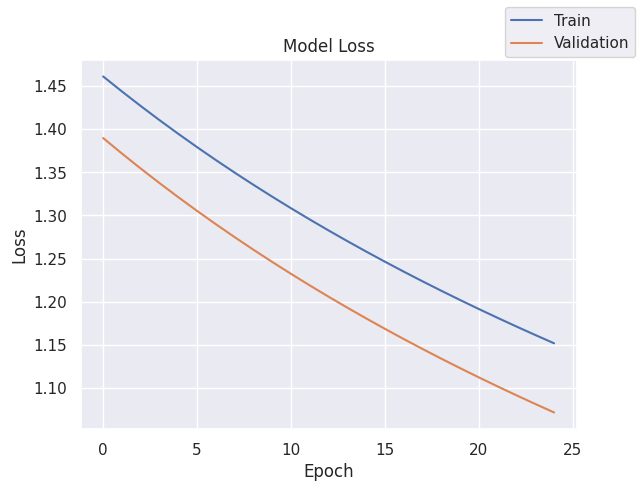

In [55]:
plot(history,'loss')

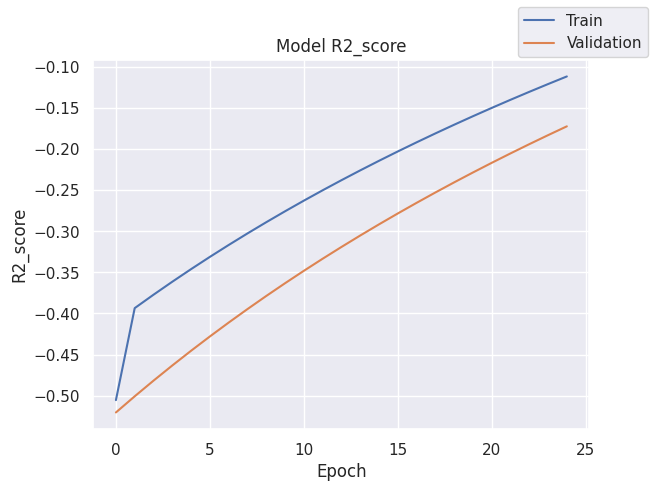

In [56]:
plot(history,'r2_score')

In [57]:
results.loc[1]=['-','-','-',epochs,batch_size,'GD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [58]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506

- As expected, we see an increase in the $R^2$, which is great.

### Model 2

- Even though the performance of the previous model was good, the improvement in scores from one epoch to another is very slight since the updates happen only once.
- Let's now incorporate SGD to improve learning.

In [59]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [60]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [63]:
epochs = 25
batch_size = 32

In [64]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.3303 - r2_score: -0.2054 - val_loss: 0.8325 - val_r2_score: 0.0892
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.9104 - r2_score: 0.1486 - val_loss: 0.6388 - val_r2_score: 0.3011
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.7429 - r2_score: 0.3076 - val_loss: 0.5450 - val_r2_score: 0.4037
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.6533 - r2_score: 0.3921 - val_loss: 0.4875 - val_r2_score: 0.4667
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.5930 - r2_score: 0.4487 - val_loss: 0.4462 - val_r2_score: 0.5118
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.5468 - r2_score: 0.4918 - val_loss: 0.4140 - val_r2_score: 0.5470
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.5091 - r2_score: 0.5268 - val_loss: 0.3878 - val_r2_score: 0.5757
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.4776 - r2_score: 0.5561 - val_loss: 0.3661 - val_

In [65]:
print("Time taken in seconds ",end-start)

Time taken in seconds  30.20233702659607


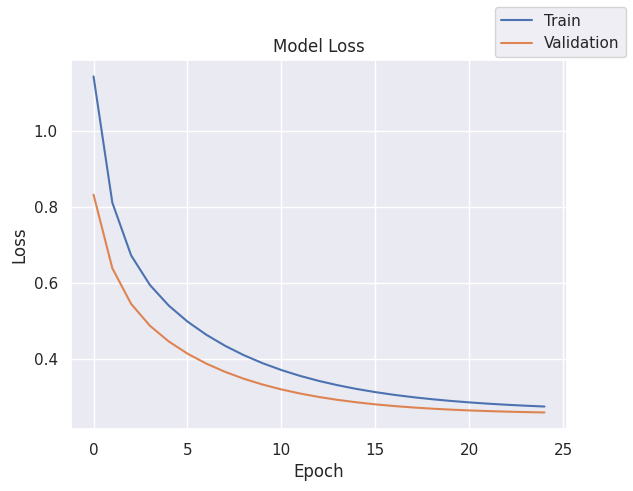

In [66]:
plot(history,'loss')

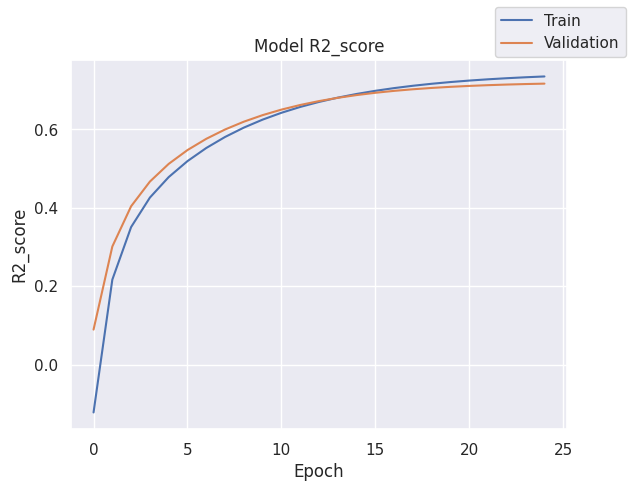

In [67]:
plot(history,'r2_score')

In [68]:
results.loc[2]=['-','-','-',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [69]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   
2                                   -        25          32       SGD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506  
2   30.202337    0.274823    0.259228         0.734712         0.716384

- After the first epoch, we see an $R^2$ of ~0.72, which is great.
- Also, the improvement in the $R^2$ after each epoch has also increased.
- Note that the time taken to train the model has also increased as model parameters are being updated more often.

### Model 3

- Let's now increase the batch size to 64 to see if the performance improves.

In [70]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [71]:
#Initializing the neural network
model = Sequential()
model.add(Dense(1,input_dim=x_train.shape[1]))

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [74]:
epochs = 25
batch_size = 64

In [75]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.9505 - r2_score: -0.1591 - val_loss: 1.7096 - val_r2_score: -0.8705
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.7747 - r2_score: -0.6884 - val_loss: 1.5540 - val_r2_score: -0.7002
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.6278 - r2_score: -0.5482 - val_loss: 1.4230 - val_r2_score: -0.5569
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.5021 - r2_score: -0.4282 - val_loss: 1.3104 - val_r2_score: -0.4336
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.3926 - r2_score: -0.3237 - val_loss: 1.2120 - val_r2_score: -0.3260
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 1.2959 - r2_score: -0.2314 - val_loss: 1.1251 - val_r2_score: -0.2310
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.2095 - r2_score: -0.1490 - val_loss: 1.0477 - val_r2_score: -0.1462
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1318 - r2_score: -0.0750 - val_loss:

In [76]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.803539037704468


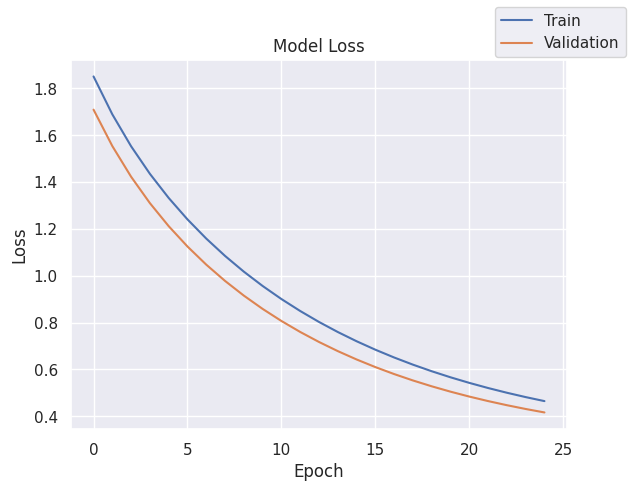

In [77]:
plot(history,'loss')

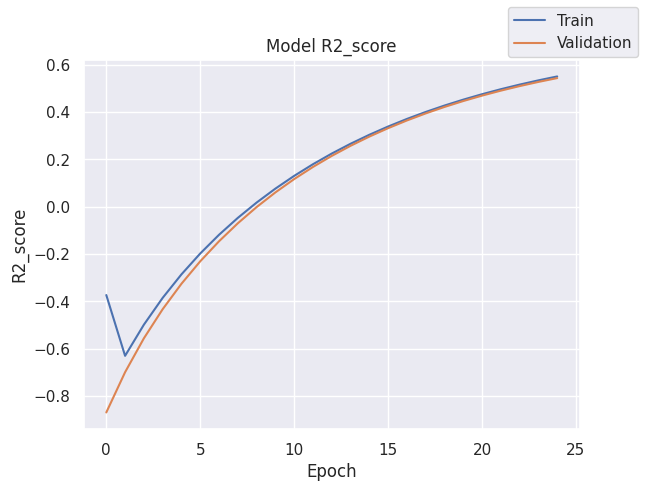

In [78]:
plot(history,'r2_score')

In [79]:
results.loc[3]=['-','-','-',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [80]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   
2                                   -        25          32       SGD   
3                                   -        25          64       SGD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506  
2   30.202337    0.274823    0.259228         0.734712         0.716384  
3   14.803539    0.464999    0.416581         0.551136         0.544228

- The performance hasn't improved, but the time taken to train the model has reduced.
- There's always a tradeoff here - performance vs computation time.

### Model 4

- Let's now add a hidden layer with 128 neurons.
- We'll use sigmoid as the activation function.

In [81]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [82]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="sigmoid",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [85]:
epochs = 25
batch_size = 64

In [86]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.1226 - r2_score: 0.2168 - val_loss: 0.8843 - val_r2_score: 0.0325
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.0405 - r2_score: 0.0178 - val_loss: 0.8626 - val_r2_score: 0.0562
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 1.0175 - r2_score: 0.0395 - val_loss: 0.8423 - val_r2_score: 0.0784
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.9959 - r2_score: 0.0599 - val_loss: 0.8233 - val_r2_score: 0.0993
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.9755 - r2_score: 0.0791 - val_loss: 0.8053 - val_r2_score: 0.1190
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9560 - r2_score: 0.0974 - val_loss: 0.7882 - val_r2_score: 0.1376
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.9375 - r2_score: 0.1149 - val_loss: 0.7720 - val_r2_score: 0.1553
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9198 - r2_score: 0.1316 - val_loss: 0.7566 - val_r

In [87]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.374562740325928


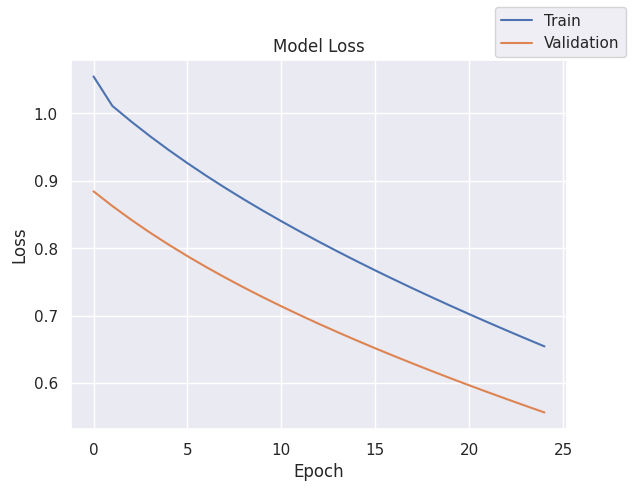

In [88]:
plot(history,'loss')

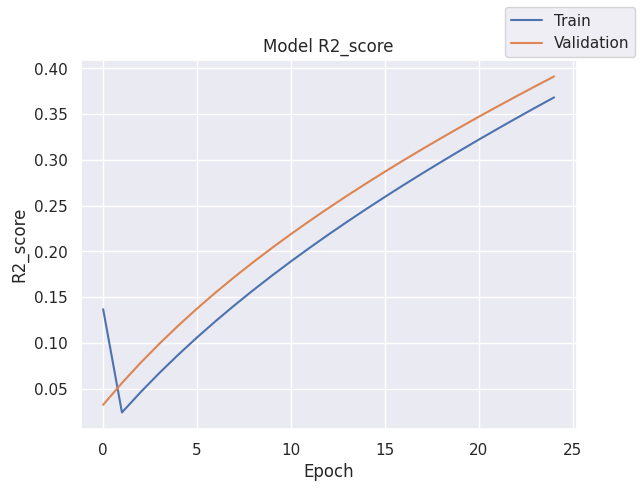

In [89]:
plot(history,'r2_score')

In [90]:
results.loc[4]=[1,128,'sigmoid',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [91]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   
4               1                      128   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   
2                                   -        25          32       SGD   
3                                   -        25          64       SGD   
4                             sigmoid        25          64       SGD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506  
2   30.202337    0.274823    0.259228         0.734712         0.716384  
3   14.803539    0.464999    0.416581         0.551136         0.544228  
4   18.374563    0.654499    0.556570         0.368211         0.391070

- We see an improvement in the model performance.
- The time taken too has not increased drastically.


### Model 5

- We'll now change the activation for the hidden layer from sigmoid to tanh.

In [92]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [93]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="tanh",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [94]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [96]:
epochs = 25
batch_size = 64

In [97]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 1.0081 - r2_score: 0.2082 - val_loss: 0.6887 - val_r2_score: 0.2465
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.7864 - r2_score: 0.2579 - val_loss: 0.5661 - val_r2_score: 0.3806
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.6595 - r2_score: 0.3770 - val_loss: 0.4841 - val_r2_score: 0.4703
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5680 - r2_score: 0.4630 - val_loss: 0.4231 - val_r2_score: 0.5371
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.4978 - r2_score: 0.5290 - val_loss: 0.3768 - val_r2_score: 0.5878
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.4435 - r2_score: 0.5801 - val_loss: 0.3418 - val_r2_score: 0.6260
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.4018 - r2_score: 0.6193 - val_loss: 0.3157 - val_r2_score: 0.6546
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.3700 - r2_score: 0.6491 - val_loss: 0.2966 - val_r

In [98]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.513087272644043


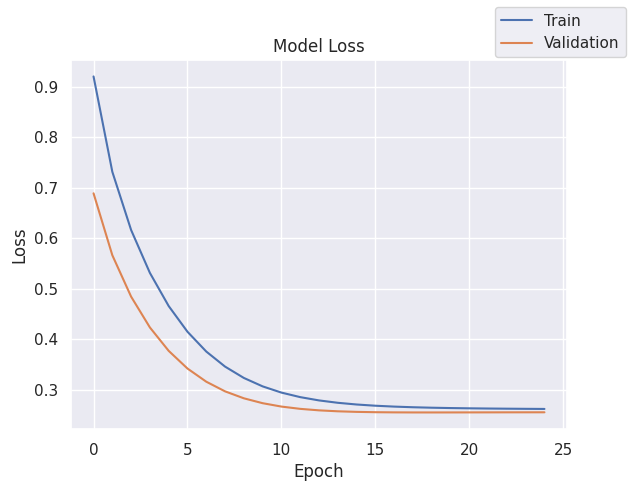

In [99]:
plot(history,'loss')

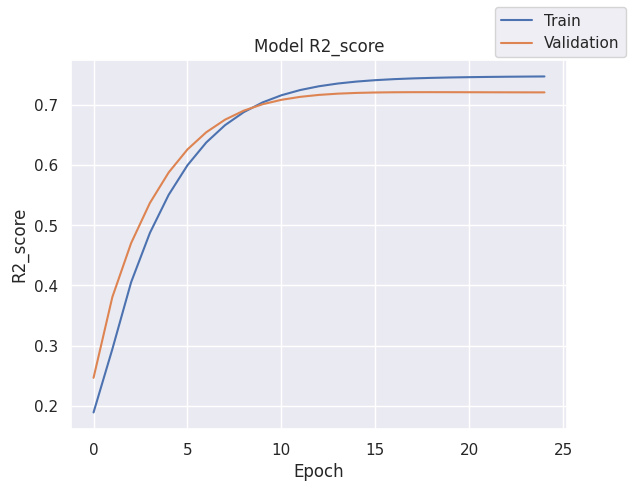

In [100]:
plot(history,'r2_score')

In [101]:
results.loc[5]=[1,128,'tanh',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [102]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   
4               1                      128   
5               1                      128   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   
2                                   -        25          32       SGD   
3                                   -        25          64       SGD   
4                             sigmoid        25          64       SGD   
5                                tanh        25          64       SGD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506  
2   30.202337    0.274823    0.259228         0.734712         0.716384  
3   14.803539    0.464999    0.416581         0.551136         0.544228  
4   18.374563    0.654499    0.556570         0.368211         0.391070  
5   16.513087    0.261808    0.255176         0.747277         0.720819

- Changing the activation has improved the $R^2$.

### Model 6

- We'll now change the activation for the hidden layer from tanh to relu

In [103]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [104]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(1))

In [105]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [107]:
epochs = 25
batch_size = 64

In [108]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 1.0928 - r2_score: 0.3072 - val_loss: 0.8359 - val_r2_score: 0.0854
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.9552 - r2_score: 0.1001 - val_loss: 0.7532 - val_r2_score: 0.1760
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.8670 - r2_score: 0.1826 - val_loss: 0.6887 - val_r2_score: 0.2465
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.7966 - r2_score: 0.2486 - val_loss: 0.6346 - val_r2_score: 0.3057
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.7355 - r2_score: 0.3059 - val_loss: 0.5868 - val_r2_score: 0.3580
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.6805 - r2_score: 0.3576 - val_loss: 0.5441 - val_r2_score: 0.4047
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.6304 - r2_score: 0.4047 - val_loss: 0.5050 - val_r2_score: 0.4475
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.5841 - r2_score: 0.4483 - val_loss: 0.4694 - val_

In [109]:
print("Time taken in seconds ",end-start)

Time taken in seconds  20.049206495285034


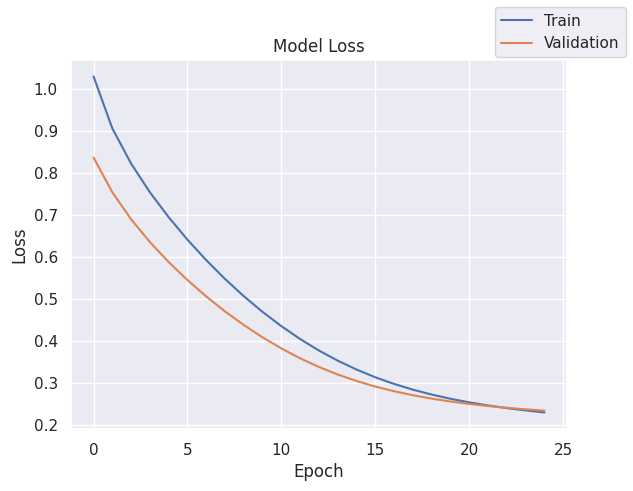

In [110]:
plot(history,'loss')

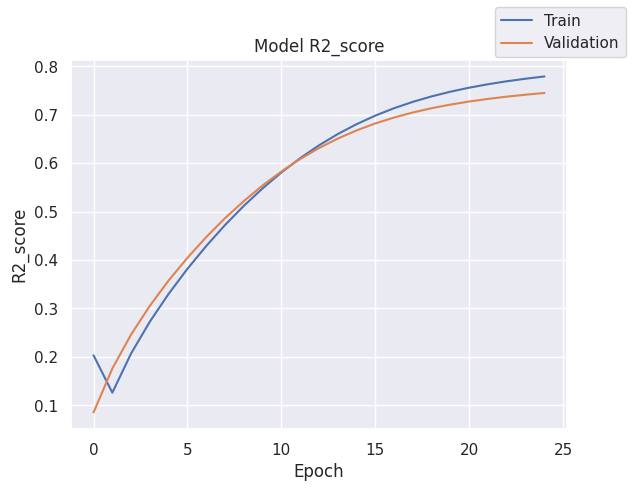

In [111]:
plot(history,'r2_score')

In [112]:
results.loc[6]=[1,128,'relu',epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [113]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   
4               1                      128   
5               1                      128   
6               1                      128   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   
2                                   -        25          32       SGD   
3                                   -        25          64       SGD   
4                             sigmoid        25          64       SGD   
5                                tanh        25          64       SGD   
6                                relu        25          64       SGD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506  
2   30.202337    0.274823    0.259228         0.734712         0.716384  
3   14.803539    0.464999    0.416581         0.551136         0.544228  
4   18.374563    0.654499    0.556570         0.368211         0.391070  
5   16.513087    0.261808    0.255176         0.747277         0.720819  
6   20.049206    0.229061    0.233283         0.778887         0.744770

- We couldn't see much improvement

### Model 7

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [114]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [115]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

In [116]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [118]:
epochs = 25
batch_size = 64

In [119]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 1.0893 - r2_score: 0.3195 - val_loss: 0.8023 - val_r2_score: 0.1223
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.9261 - r2_score: 0.1264 - val_loss: 0.7304 - val_r2_score: 0.2009
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.8437 - r2_score: 0.2033 - val_loss: 0.6720 - val_r2_score: 0.2648
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.7753 - r2_score: 0.2676 - val_loss: 0.6175 - val_r2_score: 0.3244
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.7107 - r2_score: 0.3284 - val_loss: 0.5651 - val_r2_score: 0.3817
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.6470 - r2_score: 0.3885 - val_loss: 0.5132 - val_r2_score: 0.4385
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.5835 - r2_score: 0.4485 - val_loss: 0.4626 - val_r2_score: 0.4939
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.5209 - r2_score: 0.5075 - val_loss: 0.4143 - val_r

In [120]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.098841190338135


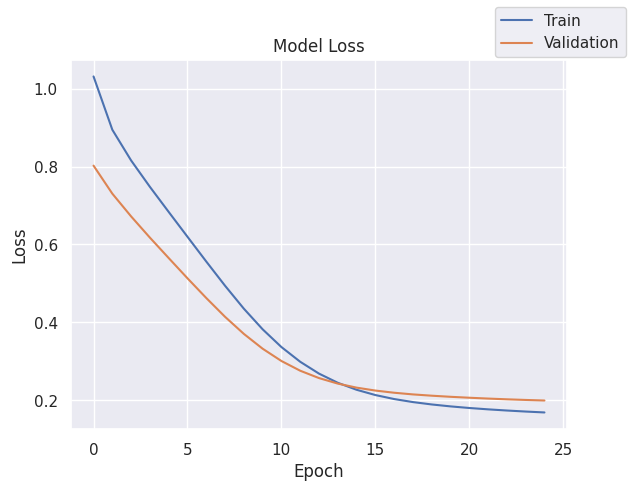

In [121]:
plot(history,'loss')

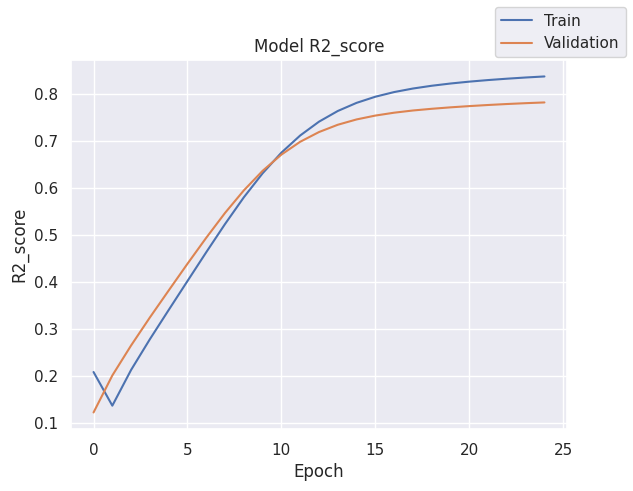

In [122]:
plot(history,'r2_score')

In [123]:
results.loc[7]=[2,[128,32],['relu','relu'],epochs,batch_size,'SGD',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [124]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   
4               1                      128   
5               1                      128   
6               1                      128   
7               2                [128, 32]   

  activation function - hidden layer   # epochs  batch size optimizer  \
0                                   -        10         749        GD   
1                                   -        25         749        GD   
2                                   -        25          32       SGD   
3                                   -        25          64       SGD   
4                             sigmoid        25          64       SGD   
5                                tanh        25          64       SGD   
6                                relu        25          64       SGD   
7                        [relu, relu]        25          64       SGD   

   time(secs)  Train_loss  Valid_loss  Train_R-squared  Valid_R-squared  
0    2.657189    1.595851    1.608799        -0.540478        -0.760149  
1    5.980409    1.151817    1.071685        -0.111851        -0.172506  
2   30.202337    0.274823    0.259228         0.734712         0.716384  
3   14.803539    0.464999    0.416581         0.551136         0.544228  
4   18.374563    0.654499    0.556570         0.368211         0.391070  
5   16.513087    0.261808    0.255176         0.747277         0.720819  
6   20.049206    0.229061    0.233283         0.778887         0.744770  
7   18.098841    0.168961    0.199590         0.836901         0.781633

- Adding a hidden layer didn't improve the performance of the model.

### Model 8

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [125]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [126]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

In [127]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
optimizer = keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [129]:
epochs = 25
batch_size = 64

In [130]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - loss: 1.0717 - r2_score: 0.3444 - val_loss: 0.7186 - val_r2_score: 0.2138
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.7591 - r2_score: 0.2839 - val_loss: 0.4796 - val_r2_score: 0.4753
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.4586 - r2_score: 0.5665 - val_loss: 0.2329 - val_r2_score: 0.7452
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.2368 - r2_score: 0.7730 - val_loss: 0.2124 - val_r2_score: 0.7676
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1958 - r2_score: 0.8106 - val_loss: 0.1915 - val_r2_score: 0.7905
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.1722 - r2_score: 0.8337 - val_loss: 0.1857 - val_r2_score: 0.7968
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.1583 - r2_score: 0.8468 - val_loss: 0.1803 - val_r2_score: 0.8027
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1519 - r2_score: 0.8525 - val_loss: 0.1793 - val_

In [131]:
print("Time taken in seconds ",end-start)

Time taken in seconds  22.520004987716675


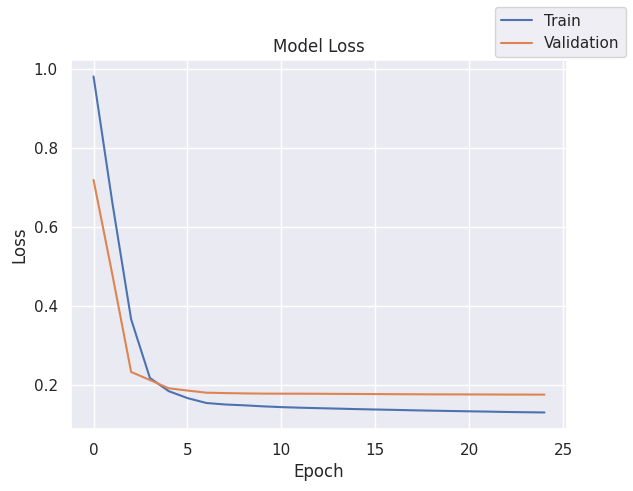

In [132]:
plot(history,'loss')

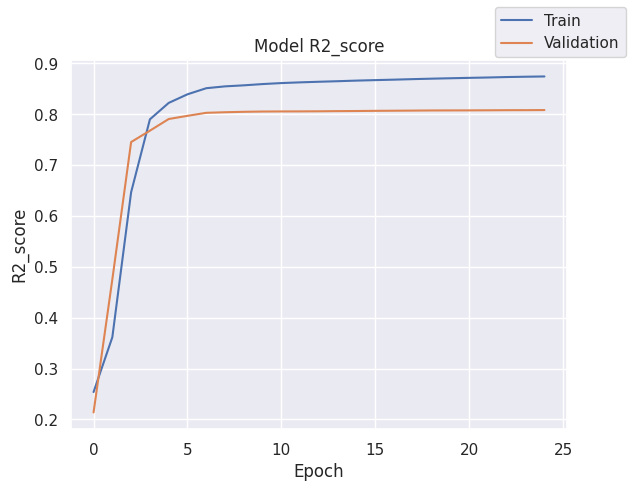

In [133]:
plot(history,'r2_score')

In [134]:
results.loc[8]=[2,[128,32],['relu','relu'],epochs,batch_size,['SGD', 'momemtum=0.9'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [135]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   
4               1                      128   
5               1                      128   
6               1                      128   
7               2                [128, 32]   
8               2                [128, 32]   

  activation function - hidden layer   # epochs  batch size  \
0                                   -        10         749   
1                                   -        25         749   
2                                   -        25          32   
3                                   -        25          64   
4                             sigmoid        25          64   
5                                tanh        25          64   
6                                relu        25          64   
7                        [relu, relu]        25          64   
8                        [relu, relu]        25          64   

             optimizer  time(secs)  Train_loss  Valid_loss  Train_R-squared  \
0                   GD    2.657189    1.595851    1.608799        -0.540478   
1                   GD    5.980409    1.151817    1.071685        -0.111851   
2                  SGD   30.202337    0.274823    0.259228         0.734712   
3                  SGD   14.803539    0.464999    0.416581         0.551136   
4                  SGD   18.374563    0.654499    0.556570         0.368211   
5                  SGD   16.513087    0.261808    0.255176         0.747277   
6                  SGD   20.049206    0.229061    0.233283         0.778887   
7                  SGD   18.098841    0.168961    0.199590         0.836901   
8  [SGD, momemtum=0.9]   22.520005    0.130349    0.175378         0.874174   

   Valid_R-squared  
0        -0.760149  
1        -0.172506  
2         0.716384  
3         0.544228  
4         0.391070  
5         0.720819  
6         0.744770  
7         0.781633  
8         0.808123

- Adding a hidden layer didn't improve the performance of the model.

### Model 9

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [136]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [137]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

In [138]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [139]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [140]:
epochs = 25
batch_size = 64

In [141]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 1.1401 - r2_score: 0.3297 - val_loss: 0.7108 - val_r2_score: 0.2223
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.8163 - r2_score: 0.2307 - val_loss: 0.5589 - val_r2_score: 0.3885
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.6394 - r2_score: 0.3963 - val_loss: 0.4225 - val_r2_score: 0.5378
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.4646 - r2_score: 0.5611 - val_loss: 0.3117 - val_r2_score: 0.6590
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.3256 - r2_score: 0.6917 - val_loss: 0.2447 - val_r2_score: 0.7323
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.2413 - r2_score: 0.7700 - val_loss: 0.2178 - val_r2_score: 0.7617
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.2006 - r2_score: 0.8073 - val_loss: 0.2026 - val_r2_score: 0.7784
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1770 - r2_score: 0.8292 - val_loss: 0.1893 - val_

In [142]:
print("Time taken in seconds ",end-start)

Time taken in seconds  31.178914546966553


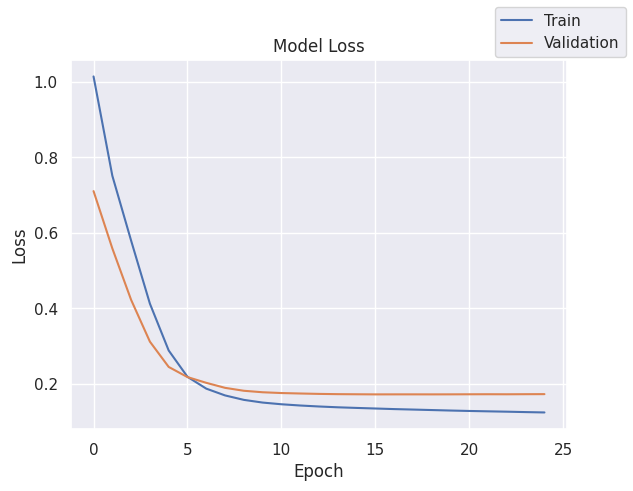

In [143]:
plot(history,'loss')

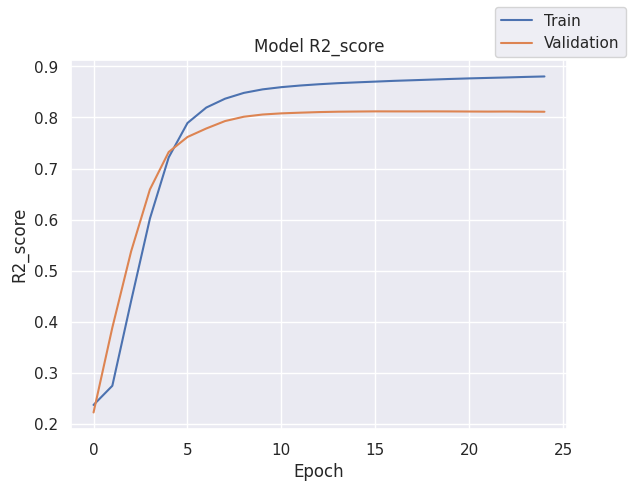

In [144]:
plot(history,'r2_score')

In [145]:
results.loc[9]=[2,[128,32],['relu','relu'],epochs,batch_size,'Adam',(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [146]:
results

# hidden layers # neurons - hidden layer  \
0               -                        -   
1               -                        -   
2               -                        -   
3               -                        -   
4               1                      128   
5               1                      128   
6               1                      128   
7               2                [128, 32]   
8               2                [128, 32]   
9               2                [128, 32]   

  activation function - hidden layer   # epochs  batch size  \
0                                   -        10         749   
1                                   -        25         749   
2                                   -        25          32   
3                                   -        25          64   
4                             sigmoid        25          64   
5                                tanh        25          64   
6                                relu        25          64   
7                        [relu, relu]        25          64   
8                        [relu, relu]        25          64   
9                        [relu, relu]        25          64   

             optimizer  time(secs)  Train_loss  Valid_loss  Train_R-squared  \
0                   GD    2.657189    1.595851    1.608799        -0.540478   
1                   GD    5.980409    1.151817    1.071685        -0.111851   
2                  SGD   30.202337    0.274823    0.259228         0.734712   
3                  SGD   14.803539    0.464999    0.416581         0.551136   
4                  SGD   18.374563    0.654499    0.556570         0.368211   
5                  SGD   16.513087    0.261808    0.255176         0.747277   
6                  SGD   20.049206    0.229061    0.233283         0.778887   
7                  SGD   18.098841    0.168961    0.199590         0.836901   
8  [SGD, momemtum=0.9]   22.520005    0.130349    0.175378         0.874174   
9                 Adam   31.178915    0.124052    0.172608         0.880252   

   Valid_R-squared  
0        -0.760149  
1        -0.172506  
2         0.716384  
3         0.544228  
4         0.391070  
5         0.720819  
6         0.744770  
7         0.781633  
8         0.808123  
9         0.811154

- Adding a hidden layer didn't improve the performance of the model.

### Model 10

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [147]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [148]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

In [149]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [151]:
epochs = 25
batch_size = 64

In [152]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 1.2238 - r2_score: 0.2810 - val_loss: 0.8433 - val_r2_score: 0.0773
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.9960 - r2_score: 0.0615 - val_loss: 0.7397 - val_r2_score: 0.1907
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.8729 - r2_score: 0.1768 - val_loss: 0.6304 - val_r2_score: 0.3103
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.7566 - r2_score: 0.2860 - val_loss: 0.5208 - val_r2_score: 0.4302
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.6556 - r2_score: 0.3824 - val_loss: 0.4082 - val_r2_score: 0.5534
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.4982 - r2_score: 0.5293 - val_loss: 0.3146 - val_r2_score: 0.6558
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.4237 - r2_score: 0.5972 - val_loss: 0.2606 - val_r2_score: 0.7148
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.3845 - r2_score: 0.6335 - val_loss: 0.2350 - val

In [153]:
print("Time taken in seconds ",end-start)

Time taken in seconds  32.17202639579773


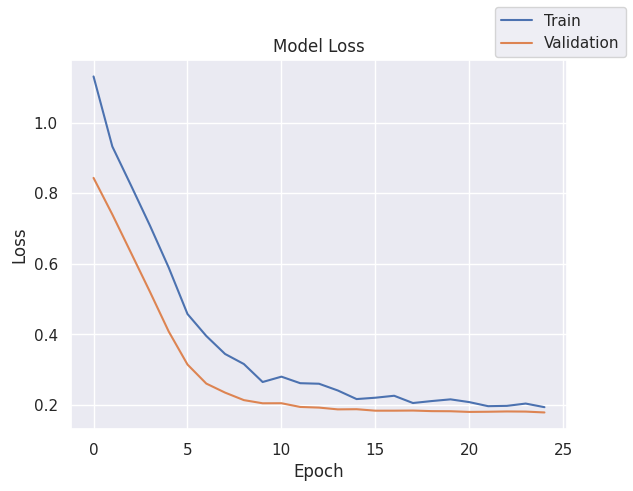

In [154]:
plot(history,'loss')

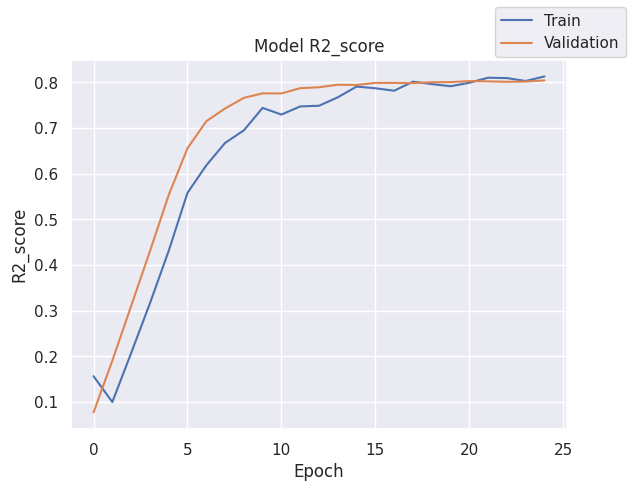

In [155]:
plot(history,'r2_score')

In [156]:
results.loc[10]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','dropout=0.4'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [157]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   

              optimizer  time(secs)  Train_loss  Valid_loss  Train_R-squared  \
0                    GD    2.657189    1.595851    1.608799        -0.540478   
1                    GD    5.980409    1.151817    1.071685        -0.111851   
2                   SGD   30.202337    0.274823    0.259228         0.734712   
3                   SGD   14.803539    0.464999    0.416581         0.551136   
4                   SGD   18.374563    0.654499    0.556570         0.368211   
5                   SGD   16.513087    0.261808    0.255176         0.747277   
6                   SGD   20.049206    0.229061    0.233283         0.778887   
7                   SGD   18.098841    0.168961    0.199590         0.836901   
8   [SGD, momemtum=0.9]   22.520005    0.130349    0.175378         0.874174   
9                  Adam   31.178915    0.124052    0.172608         0.880252   
10  [Adam, dropout=0.4]   32.172026    0.193735    0.178815         0.812988   

    Valid_R-squared  
0         -0.760149  
1         -0.172506  
2          0.716384  
3          0.544228  
4          0.391070  
5          0.720819  
6          0.744770  
7          0.781633  
8          0.808123  
9          0.811154  
10         0.804363

- Adding a hidden layer didn't improve the performance of the model.

### Model 11

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [158]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [159]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

In [160]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [162]:
epochs = 25
batch_size = 64

In [163]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.9637 - r2_score: 0.4116 - val_loss: 0.6254 - val_r2_score: 0.3157
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.7715 - r2_score: 0.2730 - val_loss: 0.4859 - val_r2_score: 0.4684
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.5884 - r2_score: 0.4443 - val_loss: 0.3601 - val_r2_score: 0.6060
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.4314 - r2_score: 0.5923 - val_loss: 0.2821 - val_r2_score: 0.6914
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.3460 - r2_score: 0.6696 - val_loss: 0.2406 - val_r2_score: 0.7368
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.3048 - r2_score: 0.7093 - val_loss: 0.2148 - val_r2_score: 0.7650
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.2502 - r2_score: 0.7610 - val_loss: 0.1983 - val_r2_score: 0.7830
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.2203 - r2_score: 0.7868 - val_loss: 0.1895 - val

In [164]:
print("Time taken in seconds ",end-start)

Time taken in seconds  28.450236558914185


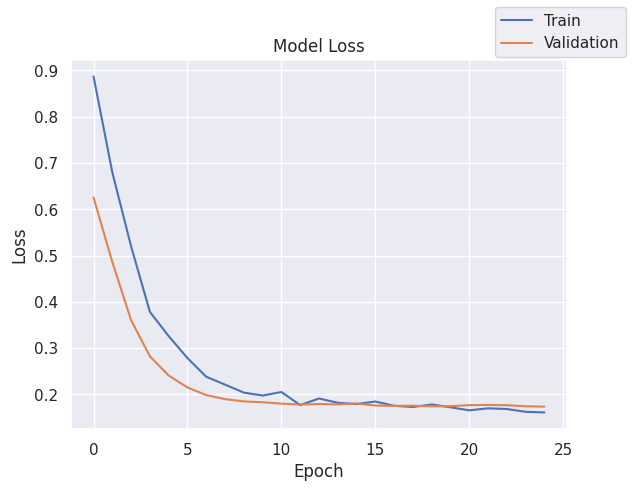

In [165]:
plot(history,'loss')

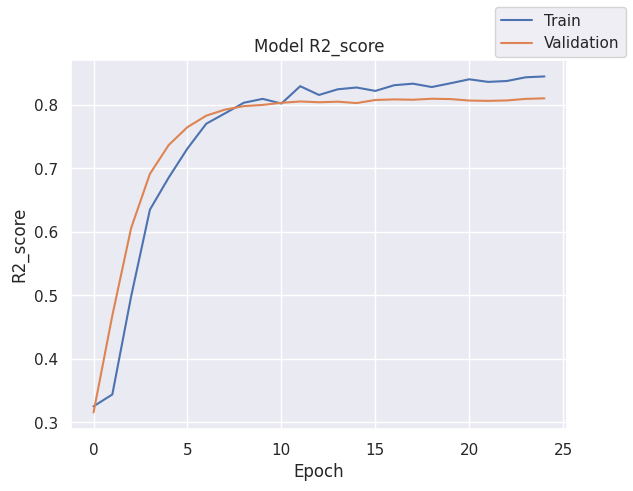

In [166]:
plot(history,'r2_score')

In [167]:
results.loc[11]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','dropout=0.2'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [168]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   

              optimizer  time(secs)  Train_loss  Valid_loss  Train_R-squared  \
0                    GD    2.657189    1.595851    1.608799        -0.540478   
1                    GD    5.980409    1.151817    1.071685        -0.111851   
2                   SGD   30.202337    0.274823    0.259228         0.734712   
3                   SGD   14.803539    0.464999    0.416581         0.551136   
4                   SGD   18.374563    0.654499    0.556570         0.368211   
5                   SGD   16.513087    0.261808    0.255176         0.747277   
6                   SGD   20.049206    0.229061    0.233283         0.778887   
7                   SGD   18.098841    0.168961    0.199590         0.836901   
8   [SGD, momemtum=0.9]   22.520005    0.130349    0.175378         0.874174   
9                  Adam   31.178915    0.124052    0.172608         0.880252   
10  [Adam, dropout=0.4]   32.172026    0.193735    0.178815         0.812988   
11  [Adam, dropout=0.2]   28.450237    0.160781    0.173356         0.844798   

    Valid_R-squared  
0         -0.760149  
1         -0.172506  
2          0.716384  
3          0.544228  
4          0.391070  
5          0.720819  
6          0.744770  
7          0.781633  
8          0.808123  
9          0.811154  
10         0.804363  
11         0.810335

- Adding a hidden layer didn't improve the performance of the model.

### Model 12

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [169]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [170]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32,activation="relu"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

In [171]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [173]:
epochs = 25
batch_size = 64

In [174]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.1068 - r2_score: 0.3386 - val_loss: 0.7214 - val_r2_score: 0.2107
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.8862 - r2_score: 0.1636 - val_loss: 0.5848 - val_r2_score: 0.3602
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.7039 - r2_score: 0.3321 - val_loss: 0.4688 - val_r2_score: 0.4871
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.6445 - r2_score: 0.3885 - val_loss: 0.3827 - val_r2_score: 0.5813
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.5769 - r2_score: 0.4555 - val_loss: 0.3306 - val_r2_score: 0.6383
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.4747 - r2_score: 0.5478 - val_loss: 0.2826 - val_r2_score: 0.6908
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.4514 - r2_score: 0.5719 - val_loss: 0.2505 - val_r2_score: 0.7260
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.4138 - r2_score: 0.6045 - val_loss: 0.2382 - val_

In [175]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.97215127944946


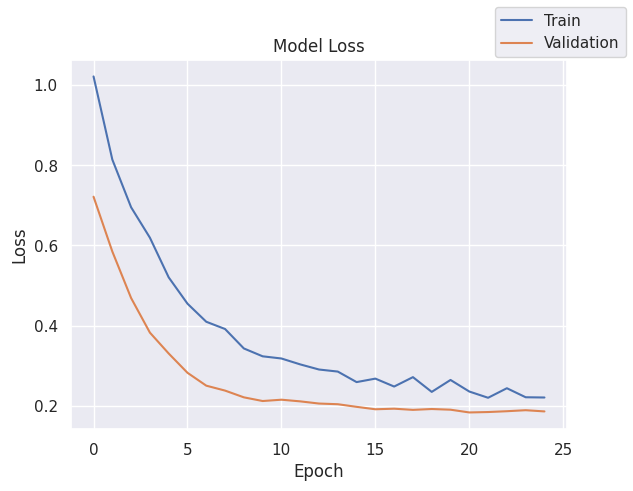

In [176]:
plot(history,'loss')

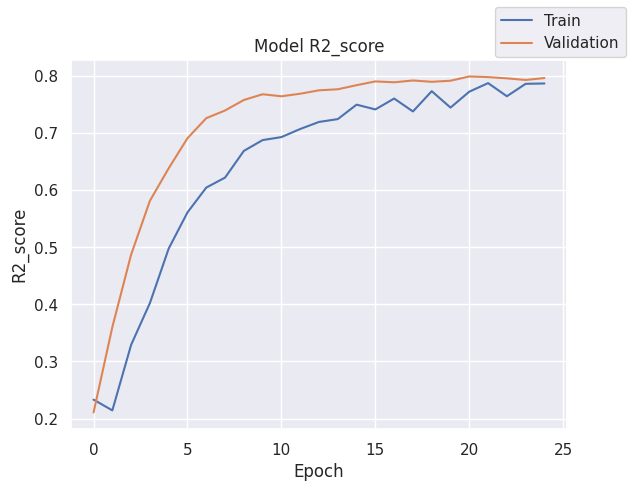

In [177]:
plot(history,'r2_score')

In [178]:
results.loc[12]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','dropout=0.4,0.2'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [179]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   
12               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   
12                        [relu, relu]        25          64   

                  optimizer  time(secs)  Train_loss  Valid_loss  \
0                        GD    2.657189    1.595851    1.608799   
1                        GD    5.980409    1.151817    1.071685   
2                       SGD   30.202337    0.274823    0.259228   
3                       SGD   14.803539    0.464999    0.416581   
4                       SGD   18.374563    0.654499    0.556570   
5                       SGD   16.513087    0.261808    0.255176   
6                       SGD   20.049206    0.229061    0.233283   
7                       SGD   18.098841    0.168961    0.199590   
8       [SGD, momemtum=0.9]   22.520005    0.130349    0.175378   
9                      Adam   31.178915    0.124052    0.172608   
10      [Adam, dropout=0.4]   32.172026    0.193735    0.178815   
11      [Adam, dropout=0.2]   28.450237    0.160781    0.173356   
12  [Adam, dropout=0.4,0.2]   34.972151    0.220964    0.186275   

    Train_R-squared  Valid_R-squared  
0         -0.540478        -0.760149  
1         -0.111851        -0.172506  
2          0.734712         0.716384  
3          0.551136         0.544228  
4          0.368211         0.391070  
5          0.747277         0.720819  
6          0.778887         0.744770  
7          0.836901         0.781633  
8          0.874174         0.808123  
9          0.880252         0.811154  
10         0.812988         0.804363  
11         0.844798         0.810335  
12         0.786703         0.796201

- Adding a hidden layer didn't improve the performance of the model.

### Model 13

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [180]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [181]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(1))

In [182]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,953 (23.25 KB)

 Trainable params: 5,633 (22.00 KB)

 Non-trainable params: 320 (1.25 KB)

In [183]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [184]:
epochs = 25
batch_size = 64

In [185]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 2.1996 - r2_score: -0.1867 - val_loss: 0.8517 - val_r2_score: 0.0681
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.6164 - r2_score: 0.4120 - val_loss: 0.7845 - val_r2_score: 0.1417
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.3710 - r2_score: 0.6435 - val_loss: 0.7483 - val_r2_score: 0.1813
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.2933 - r2_score: 0.7175 - val_loss: 0.7502 - val_r2_score: 0.1793
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 0.2387 - r2_score: 0.7702 - val_loss: 0.7362 - val_r2_score: 0.1945
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.2181 - r2_score: 0.7898 - val_loss: 0.7386 - val_r2_score: 0.1919
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.1968 - r2_score: 0.8101 - val_loss: 0.7394 - val_r2_score: 0.1910
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.1845 - r2_score: 0.8219 - val_loss: 0.743

In [186]:
print("Time taken in seconds ",end-start)

Time taken in seconds  47.33430528640747


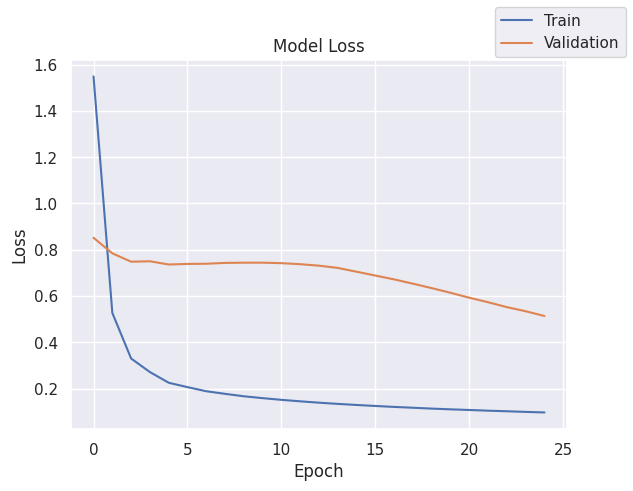

In [187]:
plot(history,'loss')

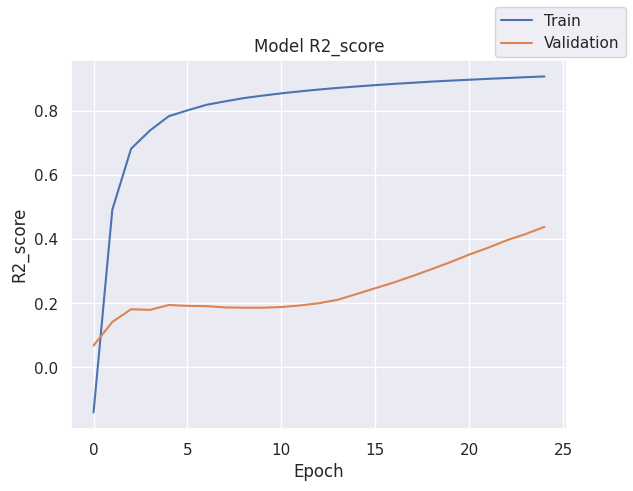

In [188]:
plot(history,'r2_score')

In [189]:
results.loc[13]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','batchnorm'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [190]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   
12               2                [128, 32]   
13               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   
12                        [relu, relu]        25          64   
13                        [relu, relu]        25          64   

                  optimizer  time(secs)  Train_loss  Valid_loss  \
0                        GD    2.657189    1.595851    1.608799   
1                        GD    5.980409    1.151817    1.071685   
2                       SGD   30.202337    0.274823    0.259228   
3                       SGD   14.803539    0.464999    0.416581   
4                       SGD   18.374563    0.654499    0.556570   
5                       SGD   16.513087    0.261808    0.255176   
6                       SGD   20.049206    0.229061    0.233283   
7                       SGD   18.098841    0.168961    0.199590   
8       [SGD, momemtum=0.9]   22.520005    0.130349    0.175378   
9                      Adam   31.178915    0.124052    0.172608   
10      [Adam, dropout=0.4]   32.172026    0.193735    0.178815   
11      [Adam, dropout=0.2]   28.450237    0.160781    0.173356   
12  [Adam, dropout=0.4,0.2]   34.972151    0.220964    0.186275   
13        [Adam, batchnorm]   47.334305    0.096449    0.513606   

    Train_R-squared  Valid_R-squared  
0         -0.540478        -0.760149  
1         -0.111851        -0.172506  
2          0.734712         0.716384  
3          0.551136         0.544228  
4          0.368211         0.391070  
5          0.747277         0.720819  
6          0.778887         0.744770  
7          0.836901         0.781633  
8          0.874174         0.808123  
9          0.880252         0.811154  
10         0.812988         0.804363  
11         0.844798         0.810335  
12         0.786703         0.796201  
13         0.906898         0.438076

- Adding a hidden layer didn't improve the performance of the model.

### Model 14

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [191]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [192]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

In [193]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,953 (23.25 KB)

 Trainable params: 5,633 (22.00 KB)

 Non-trainable params: 320 (1.25 KB)

In [194]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [195]:
epochs = 25
batch_size = 64

In [196]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 2.9469 - r2_score: -0.8248 - val_loss: 0.8149 - val_r2_score: 0.1084
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 1.9235 - r2_score: -0.8263 - val_loss: 0.8001 - val_r2_score: 0.1246
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 1.6538 - r2_score: -0.5878 - val_loss: 0.7972 - val_r2_score: 0.1278
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 1.2699 - r2_score: -0.2224 - val_loss: 0.8010 - val_r2_score: 0.1237
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 1.1917 - r2_score: -0.1495 - val_loss: 0.8399 - val_r2_score: 0.0811
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 1.1232 - r2_score: -0.0779 - val_loss: 0.8554 - val_r2_score: 0.0641
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 1.0690 - r2_score: -0.0251 - val_loss: 0.8323 - val_r2_score: 0.0894
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.9744 - r2_score: 0.0617 - val_loss:

In [197]:
print("Time taken in seconds ",end-start)

Time taken in seconds  55.11036229133606


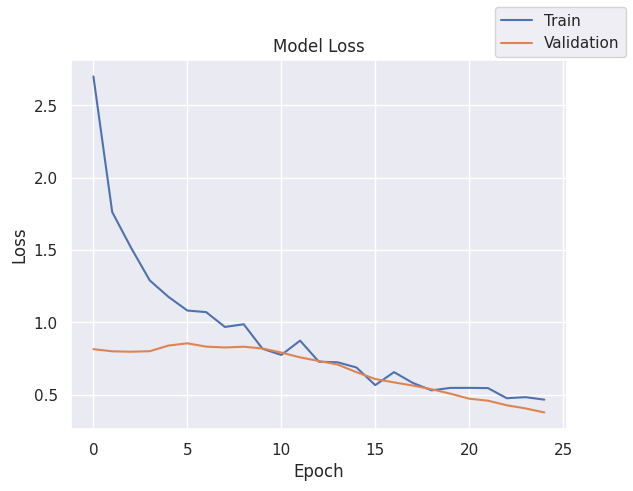

In [198]:
plot(history,'loss')

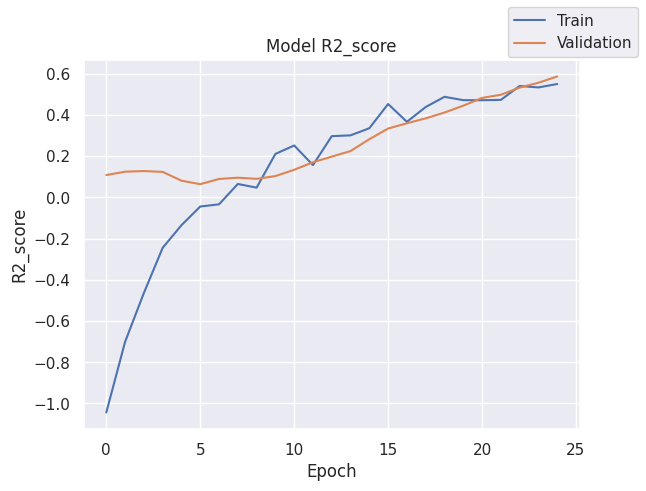

In [199]:
plot(history,'r2_score')

In [200]:
results.loc[14]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','batchnorm','dropout=0.4,0.2'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [201]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   
12               2                [128, 32]   
13               2                [128, 32]   
14               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   
12                        [relu, relu]        25          64   
13                        [relu, relu]        25          64   
14                        [relu, relu]        25          64   

                             optimizer  time(secs)  Train_loss  Valid_loss  \
0                                   GD    2.657189    1.595851    1.608799   
1                                   GD    5.980409    1.151817    1.071685   
2                                  SGD   30.202337    0.274823    0.259228   
3                                  SGD   14.803539    0.464999    0.416581   
4                                  SGD   18.374563    0.654499    0.556570   
5                                  SGD   16.513087    0.261808    0.255176   
6                                  SGD   20.049206    0.229061    0.233283   
7                                  SGD   18.098841    0.168961    0.199590   
8                  [SGD, momemtum=0.9]   22.520005    0.130349    0.175378   
9                                 Adam   31.178915    0.124052    0.172608   
10                 [Adam, dropout=0.4]   32.172026    0.193735    0.178815   
11                 [Adam, dropout=0.2]   28.450237    0.160781    0.173356   
12             [Adam, dropout=0.4,0.2]   34.972151    0.220964    0.186275   
13                   [Adam, batchnorm]   47.334305    0.096449    0.513606   
14  [Adam, batchnorm, dropout=0.4,0.2]   55.110362    0.466051    0.377659   

    Train_R-squared  Valid_R-squared  
0         -0.540478        -0.760149  
1         -0.111851        -0.172506  
2          0.734712         0.716384  
3          0.551136         0.544228  
4          0.368211         0.391070  
5          0.747277         0.720819  
6          0.778887         0.744770  
7          0.836901         0.781633  
8          0.874174         0.808123  
9          0.880252         0.811154  
10         0.812988         0.804363  
11         0.844798         0.810335  
12         0.786703         0.796201  
13         0.906898         0.438076  
14         0.550120         0.586812

- Adding a hidden layer didn't improve the performance of the model.

### Model 15

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [202]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [203]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",kernel_initializer="he_normal",input_dim=x_train.shape[1]))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32,activation="relu",kernel_initializer="he_normal"))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

In [204]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

In [205]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [206]:
epochs = 25
batch_size = 64

In [207]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 2.7191 - r2_score: -0.6400 - val_loss: 1.1508 - val_r2_score: -0.2590
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 2.0001 - r2_score: -0.8834 - val_loss: 0.8015 - val_r2_score: 0.1231
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.4724 - r2_score: -0.4095 - val_loss: 0.6363 - val_r2_score: 0.3039
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 1.2062 - r2_score: -0.1508 - val_loss: 0.5560 - val_r2_score: 0.3917
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 1.0221 - r2_score: 0.0304 - val_loss: 0.4971 - val_r2_score: 0.4561
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.8452 - r2_score: 0.1920 - val_loss: 0.4382 - val_r2_score: 0.5205
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.8402 - r2_score: 0.2015 - val_loss: 0.3951 - val_r2_score: 0.5677
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.7900 - r2_score: 0.2430 - val_loss: 0.3631 - 

In [208]:
print("Time taken in seconds ",end-start)

Time taken in seconds  31.332133769989014


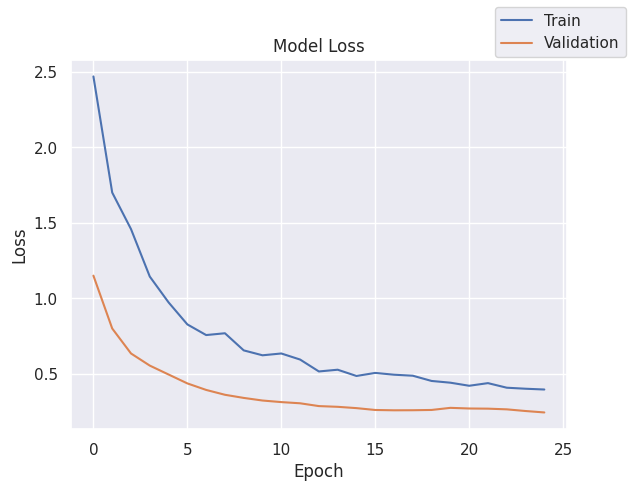

In [209]:
plot(history,'loss')

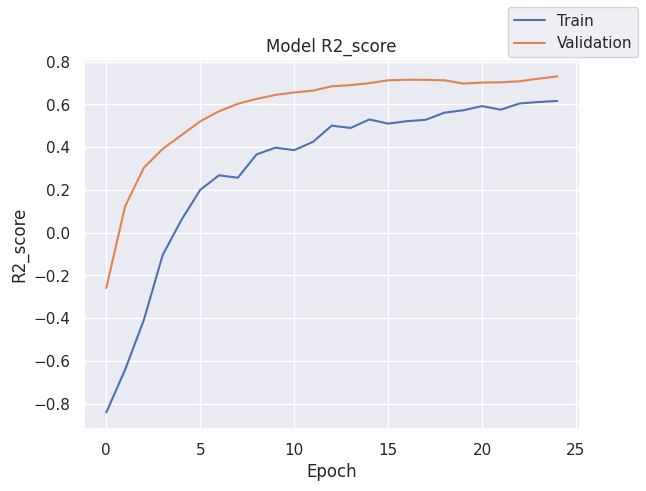

In [210]:
plot(history,'r2_score')

In [211]:
results.loc[15]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','he_normal','dropout=0.4,0.2'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [212]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   
12               2                [128, 32]   
13               2                [128, 32]   
14               2                [128, 32]   
15               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   
12                        [relu, relu]        25          64   
13                        [relu, relu]        25          64   
14                        [relu, relu]        25          64   
15                        [relu, relu]        25          64   

                             optimizer  time(secs)  Train_loss  Valid_loss  \
0                                   GD    2.657189    1.595851    1.608799   
1                                   GD    5.980409    1.151817    1.071685   
2                                  SGD   30.202337    0.274823    0.259228   
3                                  SGD   14.803539    0.464999    0.416581   
4                                  SGD   18.374563    0.654499    0.556570   
5                                  SGD   16.513087    0.261808    0.255176   
6                                  SGD   20.049206    0.229061    0.233283   
7                                  SGD   18.098841    0.168961    0.199590   
8                  [SGD, momemtum=0.9]   22.520005    0.130349    0.175378   
9                                 Adam   31.178915    0.124052    0.172608   
10                 [Adam, dropout=0.4]   32.172026    0.193735    0.178815   
11                 [Adam, dropout=0.2]   28.450237    0.160781    0.173356   
12             [Adam, dropout=0.4,0.2]   34.972151    0.220964    0.186275   
13                   [Adam, batchnorm]   47.334305    0.096449    0.513606   
14  [Adam, batchnorm, dropout=0.4,0.2]   55.110362    0.466051    0.377659   
15  [Adam, he_normal, dropout=0.4,0.2]   31.332134    0.397864    0.246200   

    Train_R-squared  Valid_R-squared  
0         -0.540478        -0.760149  
1         -0.111851        -0.172506  
2          0.734712         0.716384  
3          0.551136         0.544228  
4          0.368211         0.391070  
5          0.747277         0.720819  
6          0.778887         0.744770  
7          0.836901         0.781633  
8          0.874174         0.808123  
9          0.880252         0.811154  
10         0.812988         0.804363  
11         0.844798         0.810335  
12         0.786703         0.796201  
13         0.906898         0.438076  
14         0.550120         0.586812  
15         0.615941         0.730639

- Adding a hidden layer didn't improve the performance of the model.

### Model 16

* We will now add one more hidden layer with 32 neurons.
* We'll use relu activation in both hidden layers.

In [309]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [310]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

In [311]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [312]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [313]:
epochs = 25
batch_size = 64

In [314]:
start = time.time()
history = model.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 1.0392 - r2_score: 0.2489 - val_loss: 0.6689 - val_r2_score: 0.2682
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.8281 - r2_score: 0.2200 - val_loss: 0.5018 - val_r2_score: 0.4510
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.6088 - r2_score: 0.4264 - val_loss: 0.3383 - val_r2_score: 0.6298
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.4821 - r2_score: 0.5407 - val_loss: 0.2364 - val_r2_score: 0.7414
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.3332 - r2_score: 0.6820 - val_loss: 0.2096 - val_r2_score: 0.7707
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 0.3518 - r2_score: 0.6618 - val_loss: 0.1976 - val_r2_score: 0.7838
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.2978 - r2_score: 0.7157 - val_loss: 0.2010 - val_r2_score: 0.7801
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.2633 - r2_score: 0.7463 - val_loss: 0.1944 - va

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  31.332133769989014


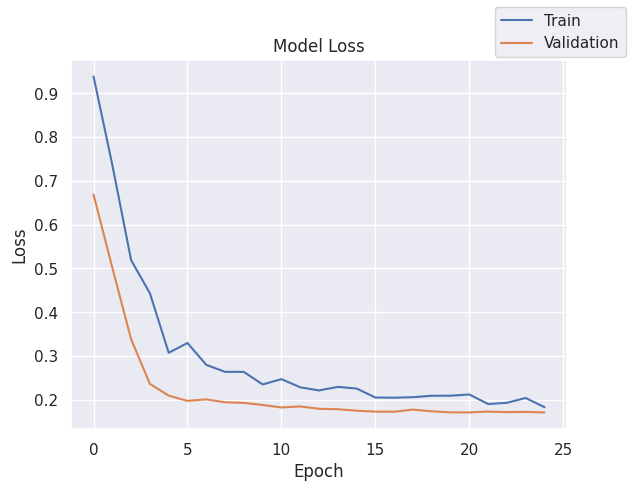

In [315]:
plot(history,'loss')

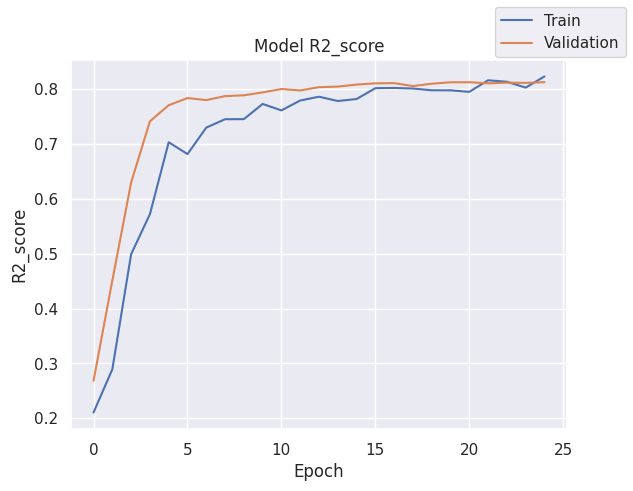

In [316]:
plot(history,'r2_score')

In [ ]:
results.loc[15]=[2,[128,32],['relu','relu'],epochs,batch_size,['Adam','he_normal','dropout=0.4,0.2'],(end-start),history.history["loss"][-1],history.history["val_loss"][-1],history.history["r2_score"][-1],history.history["val_r2_score"][-1]]

In [ ]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   
12               2                [128, 32]   
13               2                [128, 32]   
14               2                [128, 32]   
15               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   
12                        [relu, relu]        25          64   
13                        [relu, relu]        25          64   
14                        [relu, relu]        25          64   
15                        [relu, relu]        25          64   

                             optimizer  time(secs)  Train_loss  Valid_loss  \
0                                   GD    2.657189    1.595851    1.608799   
1                                   GD    5.980409    1.151817    1.071685   
2                                  SGD   30.202337    0.274823    0.259228   
3                                  SGD   14.803539    0.464999    0.416581   
4                                  SGD   18.374563    0.654499    0.556570   
5                                  SGD   16.513087    0.261808    0.255176   
6                                  SGD   20.049206    0.229061    0.233283   
7                                  SGD   18.098841    0.168961    0.199590   
8                  [SGD, momemtum=0.9]   22.520005    0.130349    0.175378   
9                                 Adam   31.178915    0.124052    0.172608   
10                 [Adam, dropout=0.4]   32.172026    0.193735    0.178815   
11                 [Adam, dropout=0.2]   28.450237    0.160781    0.173356   
12             [Adam, dropout=0.4,0.2]   34.972151    0.220964    0.186275   
13                   [Adam, batchnorm]   47.334305    0.096449    0.513606   
14  [Adam, batchnorm, dropout=0.4,0.2]   55.110362    0.466051    0.377659   
15  [Adam, he_normal, dropout=0.4,0.2]   31.332134    0.397864    0.246200   

    Train_R-squared  Valid_R-squared  
0         -0.540478        -0.760149  
1         -0.111851        -0.172506  
2          0.734712         0.716384  
3          0.551136         0.544228  
4          0.368211         0.391070  
5          0.747277         0.720819  
6          0.778887         0.744770  
7          0.836901         0.781633  
8          0.874174         0.808123  
9          0.880252         0.811154  
10         0.812988         0.804363  
11         0.844798         0.810335  
12         0.786703         0.796201  
13         0.906898         0.438076  
14         0.550120         0.586812  
15         0.615941         0.730639

- Adding a hidden layer didn't improve the performance of the model.

## Model Performance Comparison and Final Model Selection

In [213]:
results

# hidden layers # neurons - hidden layer  \
0                -                        -   
1                -                        -   
2                -                        -   
3                -                        -   
4                1                      128   
5                1                      128   
6                1                      128   
7                2                [128, 32]   
8                2                [128, 32]   
9                2                [128, 32]   
10               2                [128, 32]   
11               2                [128, 32]   
12               2                [128, 32]   
13               2                [128, 32]   
14               2                [128, 32]   
15               2                [128, 32]   

   activation function - hidden layer   # epochs  batch size  \
0                                    -        10         749   
1                                    -        25         749   
2                                    -        25          32   
3                                    -        25          64   
4                              sigmoid        25          64   
5                                 tanh        25          64   
6                                 relu        25          64   
7                         [relu, relu]        25          64   
8                         [relu, relu]        25          64   
9                         [relu, relu]        25          64   
10                        [relu, relu]        25          64   
11                        [relu, relu]        25          64   
12                        [relu, relu]        25          64   
13                        [relu, relu]        25          64   
14                        [relu, relu]        25          64   
15                        [relu, relu]        25          64   

                             optimizer  time(secs)  Train_loss  Valid_loss  \
0                                   GD    2.657189    1.595851    1.608799   
1                                   GD    5.980409    1.151817    1.071685   
2                                  SGD   30.202337    0.274823    0.259228   
3                                  SGD   14.803539    0.464999    0.416581   
4                                  SGD   18.374563    0.654499    0.556570   
5                                  SGD   16.513087    0.261808    0.255176   
6                                  SGD   20.049206    0.229061    0.233283   
7                                  SGD   18.098841    0.168961    0.199590   
8                  [SGD, momemtum=0.9]   22.520005    0.130349    0.175378   
9                                 Adam   31.178915    0.124052    0.172608   
10                 [Adam, dropout=0.4]   32.172026    0.193735    0.178815   
11                 [Adam, dropout=0.2]   28.450237    0.160781    0.173356   
12             [Adam, dropout=0.4,0.2]   34.972151    0.220964    0.186275   
13                   [Adam, batchnorm]   47.334305    0.096449    0.513606   
14  [Adam, batchnorm, dropout=0.4,0.2]   55.110362    0.466051    0.377659   
15  [Adam, he_normal, dropout=0.4,0.2]   31.332134    0.397864    0.246200   

    Train_R-squared  Valid_R-squared  
0         -0.540478        -0.760149  
1         -0.111851        -0.172506  
2          0.734712         0.716384  
3          0.551136         0.544228  
4          0.368211         0.391070  
5          0.747277         0.720819  
6          0.778887         0.744770  
7          0.836901         0.781633  
8          0.874174         0.808123  
9          0.880252         0.811154  
10         0.812988         0.804363  
11         0.844798         0.810335  
12         0.786703         0.796201  
13         0.906898         0.438076  
14         0.550120         0.586812  
15         0.615941         0.730639

- Among all other models, Model 5 and 6 achieved the highest training and validation scores.

- We can choose any one of them. Let's choose the model 6 as there is some difference in the train and valid scores and it seems to be realistic.


- We'll go ahead with this model as our final model.

- Let's rebuild it and check its performance across multiple metrics

## Final Model

In [317]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [318]:
#Initializing the neural network
model = Sequential()
model.add(Dense(128,activation="relu",input_dim=x_train.shape[1]))
#model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(32,activation="relu"))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

In [319]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [320]:
optimizer = keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=metrics,run_eagerly=True)

In [321]:
epochs = 25
batch_size = 64

In [326]:
df3 = df2.set_index('customer_id')

In [327]:
y_pred = model.predict(df3)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [328]:
y_pred_df = pd.DataFrame(y_pred, columns=['charges'], index=df3.index)
results_df = pd.concat([df3, y_pred_df], axis=1)


In [329]:
num_columns = ["age","bmi","children","charges"]

results_df[num_columns]=scaler.inverse_transform(results_df[num_columns])

In [330]:
results_df

age        bmi  children  sex_male  smoker_yes  \
customer_id                                                         
765          45.808252  24.899474  2.107167         0           0   
888          36.724541  29.548441  0.014065         0           0   
891          64.984977  26.540286  0.014065         0           1   
1294         46.817554  25.446411  3.153718         1           0   
260          19.566419  31.371566  0.014065         1           1   
...                ...        ...       ...       ...         ...   
110          63.975676  34.413305  0.014065         1           1   
576          58.929169  26.813755  0.014065         0           0   
536          38.743143  27.634161  1.060616         1           0   
544          54.891964  46.234828  0.014065         0           1   
847          51.864060  33.559315  1.060616         0           0   

             region_northwest  region_southeast  region_southwest  \
customer_id                                                         
765                         0                 0                 0   
888                         1                 0                 0   
891                         1                 0                 0   
1294                        1                 0                 0   
260                         1                 0                 0   
...                       ...               ...               ...   
110                         0                 1                 0   
576                         1                 0                 0   
536                         0                 0                 0   
544                         0                 1                 0   
847                         0                 0                 1   

                  charges  
customer_id                
765          15190.353403  
888          14121.474244  
891          16258.051381  
1294         16568.599388  
260          14075.659023  
...                   ...  
110          15938.198938  
576          15240.958688  
536          13844.855676  
544          14629.095858  
847          15093.403889  

[268 rows x 9 columns]

In [331]:
final_result=results_df[['charges']]

In [332]:
final_result.to_csv('/content/drive/My Drive/Colab Notebooks/Hackathon - Insurance Price/final_result.csv')

- The model has an $R^2$ of ~0.84 on the test set, which means it can explain ~84% of the variance in the unseen data

- The RMSE value is ~2.7 , which means the model can predict the price of a used car within 2.7 units of the actual value

- The MAPE value is ~1.4 , which means the model can predict the price of a used car within  ~ 1.4% of the actual value

## Random Forest

In [14]:
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor
)
import math
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics

In [42]:
df1=df.copy()

# Define the columns to scale
num_columns = ["age","bmi","children","charges"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(df1[num_columns])
df1[num_columns] = scaler.transform(df1[num_columns])
df1 = df1.set_index('customer_id')


In [59]:
df1=df.copy()
df1 = df1.set_index('customer_id')

In [51]:
target='charges'
X = df1.drop([target], axis=1)
#Y = df1[target]
Y = np.log1p(df1["charges"])

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [37]:
X_train

age     bmi  children  sex_male  smoker_yes  region_northwest  \
customer_id                                                                   
750          28.0  30.875       0.0       1.0         0.0               1.0   
1334         50.0  30.970       3.0       1.0         0.0               1.0   
203          60.0  24.035       0.0       0.0         0.0               1.0   
1208         36.0  33.400       2.0       1.0         1.0               0.0   
743          53.0  34.105       0.0       1.0         1.0               0.0   
...           ...     ...       ...       ...         ...               ...   
1188         62.0  32.680       0.0       0.0         0.0               1.0   
1078         21.0  26.030       0.0       1.0         0.0               0.0   
113          37.0  30.800       0.0       1.0         0.0               0.0   
631          53.0  36.100       1.0       1.0         0.0               0.0   
1239         37.0  22.705       3.0       1.0         0.0               0.0   

             region_southeast  region_southwest  
customer_id                                      
750                       0.0               0.0  
1334                      0.0               0.0  
203                       0.0               0.0  
1208                      0.0               1.0  
743                       0.0               0.0  
...                       ...               ...  
1188                      0.0               0.0  
1078                      0.0               0.0  
113                       0.0               1.0  
631                       0.0               1.0  
1239                      0.0               0.0  

[749 rows x 8 columns]

In [17]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [18]:
y_pred_rf = rf_estimator.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_rf)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_rf))
r2=r2_score(y_val, y_pred_rf)
print(f"RF -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

RF -> MAE=0.2246, RMSE=0.4146, R2:, 0.811956


## Hypertuning -- Random Forest

In [25]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    #"max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    #"n_estimators": np.arange(10, 40, 10),
    'n_estimators': [100, 200],
    #'max_depth': [6, 10, None],
    #'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=np.int64(5), min_samples_leaf=2,
                      min_samples_split=7, n_estimators=200, oob_score=True,
                      random_state=1)

In [26]:
y_pred_rf = rf_tuned.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_rf)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_rf))
r2=r2_score(y_val, y_pred_rf)
print(f"RF -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

RF -> MAE=0.2174, RMSE=0.3941, R2:, 0.830061


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## XGB




In [38]:
# @title
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

#xgb= XGBRegressor(

# n_estimators=100,     # number of trees
#    learning_rate=0.1,   # step size shrinkage
#    max_depth=2,          # depth of each tree
#    subsample=0.8,        # % of training data for each tree
#    colsample_bytree=0.8, # % of features per tree
#    random_state=42,
#    reg_alpha=1,        # L1 regularization (lasso-like)
#    reg_lambda=1,       # L2 regularization (ridge-like))
#)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
y_pred_xgb = xgb.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_xgb)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2=r2_score(y_val, y_pred_xgb)
print(f"XBG -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

RF -> MAE=2910.7103, RMSE=5254.5835, R2:, 0.790706


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## Hypertuned XGB




In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "learning_rate": np.linspace(0.01, 0.2, 10),
    "subsample": np.linspace(0.6, 1.0, 5),
    "colsample_bytree": np.linspace(0.6, 1.0, 5),
    "min_child_weight": [1, 2, 3, 4, 5, 6],
    "gamma": [0, 0.5, 1, 1.5, 2],
    "reg_alpha": [0, 0.001, 0.01, 0.1, 1.0],
    "reg_lambda": [0.1, 0.5, 1.0, 2.0, 5.0],
    "n_estimators": [300, 500, 700, 900, 1100]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,                     # bump up to 100+ for deeper search
    scoring="neg_root_mean_squared_error",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4) Fit search and pick best
search.fit(X_train, y_train)
best_model = search.best_estimator_
print("Best params:", search.best_params_)
print("CV best (neg RMSE):", search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'subsample': np.float64(0.8), 'reg_lambda': 5.0, 'reg_alpha': 0.01, 'n_estimators': 1100, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': np.float64(0.11555555555555555), 'gamma': 0.5, 'colsample_bytree': np.float64(1.0)}
CV best (neg RMSE): -0.3793456632853144


In [53]:
y_pred_xgbt = best_model.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_xgbt)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_xgbt))
r2=r2_score(y_val, y_pred_xgbt)
print(f"XGBT -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

XGBT -> MAE=0.2038, RMSE=0.3817, R2:, 0.824775


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## GBM




In [279]:
gb_classifier = GradientBoostingRegressor(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [280]:
y_pred_rf = gb_classifier.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_rf)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_rf))
r2=r2_score(y_val, y_pred_rf)
print(f"RF -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

RF -> MAE=0.2221, RMSE=0.4021, R2:, 0.823125


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## Hypertuned GBM




In [282]:
gbr_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": [0.1, 0.21, 0.1],
}

# Type of scoring used to compare parameter combinations
# Changed from `f1_score` to a regression metric, such as R² score.
# R² is a common choice for optimizing regression models.
r2_scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
# We use `n_jobs=-1` to parallelize the search, which speeds it up.
grid_obj = GridSearchCV(gbr_tuned, parameters, scoring=r2_scorer, cv=5, n_jobs=-1)

# Fit on training data
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
# Changed from `gbc_tuned` to `gbr_tuned`
gbr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbr_tuned.fit(X_train, y_train)

# (Optional) Inspect best params and score
print("Best params:", grid_obj.best_params_)
print("Best CV R²:", grid_obj.best_score_)

Best params: {'learning_rate': 0.1, 'max_features': 0.8, 'n_estimators': 200, 'subsample': 1}
Best CV R²: 0.8304836150239245


In [283]:
y_pred_rf = gbr_tuned.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_rf)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_rf))
r2=r2_score(y_val, y_pred_rf)
print(f"RF -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

RF -> MAE=0.2295, RMSE=0.4149, R2:, 0.811699


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## Hypertuned XGB log




In [63]:


# Feature engineering
df1["age_bmi"] = df1["age"] * df1["bmi"]
df1["smoker_bmi"] = df1["smoker_yes"] * df1["bmi"]
df1["age2"] = df1["age"] ** 2
df1["bmi30"] = (df1["bmi"] >= 30).astype(int)  # obesity flag

# Prepare X, y
X = df1.drop(columns=["charges"])
y = np.log1p(df1["charges"])  # log(1 + charges)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------
# 2. Train tuned XGBoost
# --------------------
model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=5,
    min_child_weight=2,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# --------------------
# 3. Predict & invert log
# --------------------
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

rmse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"XGB (tuned + log + FE) -> MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
y_pred_rf = gbr_tuned.predict(X_val)
mae_lin = mean_absolute_error(y_val, y_pred_rf)
rmse_lin = math.sqrt(mean_squared_error(y_val, y_pred_rf))
r2=r2_score(y_val, y_pred_rf)
print(f"RF -> MAE={mae_lin:.4f}, RMSE={rmse_lin:.4f}, R2:, {r2:1f}")

RF -> MAE=0.2295, RMSE=0.4149, R2:, 0.811699


**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## Final

```
# This is formatted as code
```






In [46]:
df2=df_test.copy()

# Define the columns to scale
num_columns_test = ["age","bmi","children"]

# Initialize the StandardScaler
scaler_test = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler_test.fit(df2[num_columns_test])
df2[num_columns_test] = scaler_test.transform(df2[num_columns_test])

In [54]:
df2=df_test.copy()

In [55]:
df2 = df2.set_index('customer_id')


In [56]:
y_pred_rf = best_model.predict(df2)

y_pred_df = pd.DataFrame(y_pred_rf, columns=['charges'], index=df2.index)
results_df = pd.concat([df2, y_pred_df], axis=1)
num_columns = ["age","bmi","children","charges"]

#results_df[num_columns]=scaler.inverse_transform(results_df[num_columns])
results_df

age     bmi  children  sex_male  smoker_yes  region_northwest  \
customer_id                                                                  
765           45  25.175         2         0           0                 0   
888           36  30.020         0         0           0                 1   
891           64  26.885         0         0           1                 1   
1294          46  25.745         3         1           0                 1   
260           19  31.920         0         1           1                 1   
...          ...     ...       ...       ...         ...               ...   
110           63  35.090         0         1           1                 0   
576           58  27.170         0         0           0                 1   
536           38  28.025         1         1           0                 0   
544           54  47.410         0         0           1                 0   
847           51  34.200         1         0           0                 0   

             region_southeast  region_southwest    charges  
customer_id                                                 
765                         0                 0   9.172477  
888                         0                 0   8.625648  
891                         0                 0  10.069448  
1294                        0                 0   9.143192  
260                         0                 0  10.405559  
...                       ...               ...        ...  
110                         1                 0  10.648713  
576                         0                 0   9.428678  
536                         0                 0   8.794803  
544                         1                 0  10.634318  
847                         0                 1   9.191243  

[268 rows x 9 columns]

In [57]:
results_df['charges'] = np.expm1(results_df['charges'])

In [58]:
final_result=results_df[['charges']]
final_result.to_csv('/content/drive/My Drive/Colab Notebooks/Hackathon - Insurance Price/final_result.csv')

**Observation:**
* The metrics has improved and there is no overfitting observed
* The difference between the train and test are minimal with F1 score as 82% in test

## Business Insights and Recommendations

1. Our neural network model has successfully explained approximately 94% of the variation in the data.
2. Our analysis has revealed that certain factors, such as the year of manufacture, the number of seats, and the maximum power of the engine, tend to increase the price of a used car. Conversely, factors like the distance traveled and engine volume tend to decrease the price of a used car.
3. Certain markets tend to have higher prices, and it would be beneficial for Cars4U to focus on these markets and establish offices in these areas if necessary.
4. We need to gather data on the cost side of things before discussing profitability in the business.
5. After analyzing the data, the next step would be to cluster the different data sets and determine whether we should create multiple models for different locations or car types.





## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### `Kilometers_Driven`

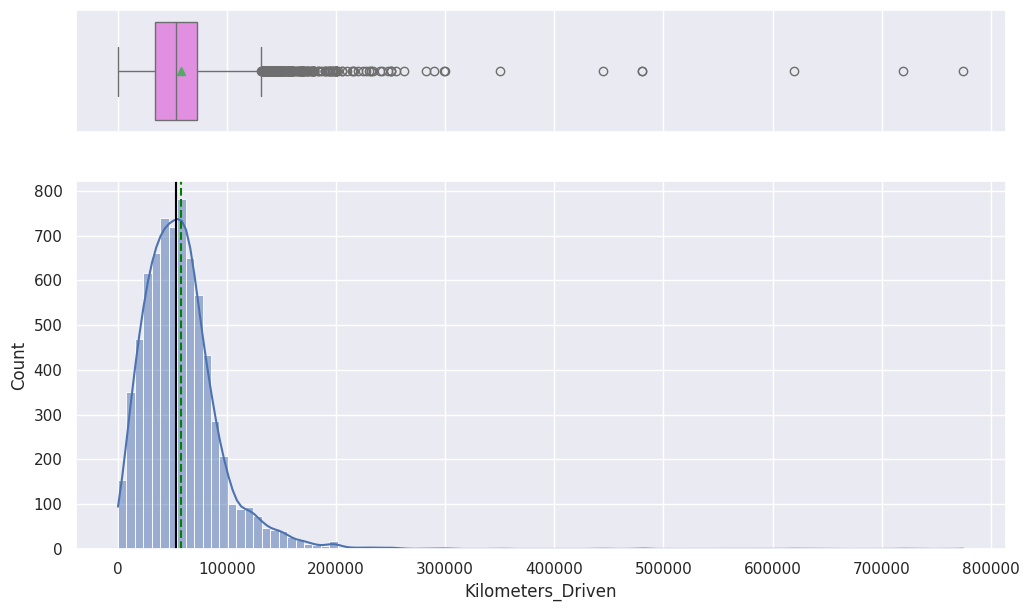

In [ ]:
histogram_boxplot(df1, "Kilometers_Driven", bins=100, kde=True)

**Observations**

* This is another highly skewed distribution.
* Let us use log transformation on this column too.

In [ ]:
df1["kilometers_driven_log"] = np.log(df1["Kilometers_Driven"])

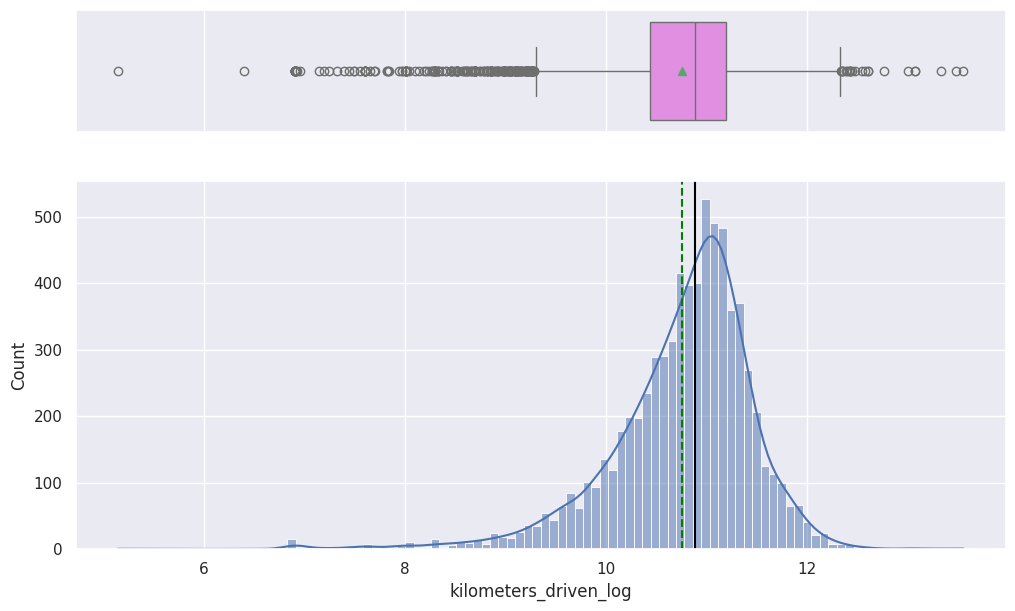

In [ ]:
histogram_boxplot(df1, "kilometers_driven_log", bins=100, kde=True)

* Transformation has reduced the extreme skewness.

#### `mileage_num`

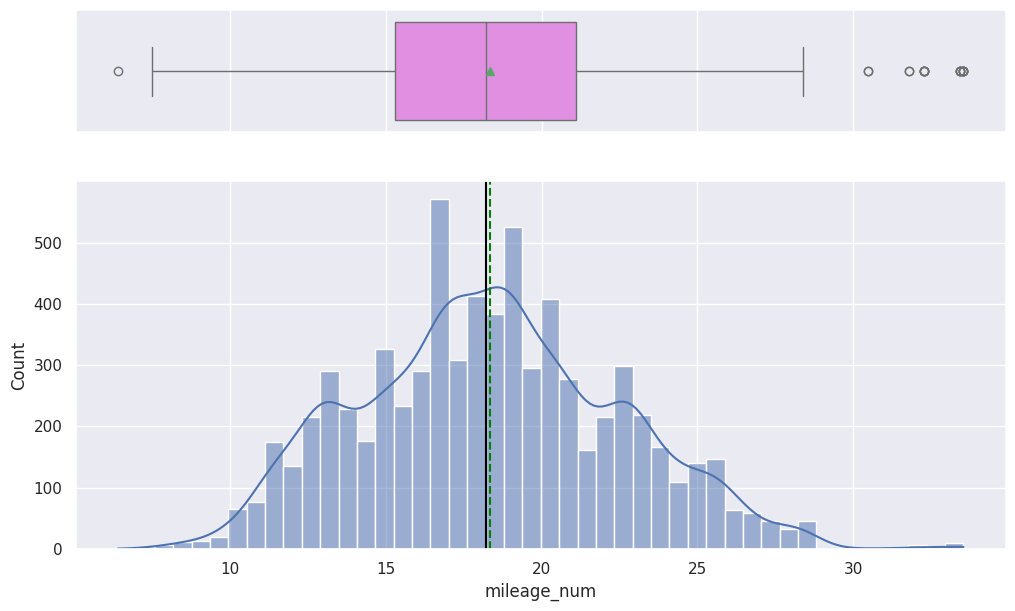

In [ ]:
histogram_boxplot(df1, "mileage_num", kde=True)

**Observations**

* This is a close to normally distributed attribute.

#### `engine_num`

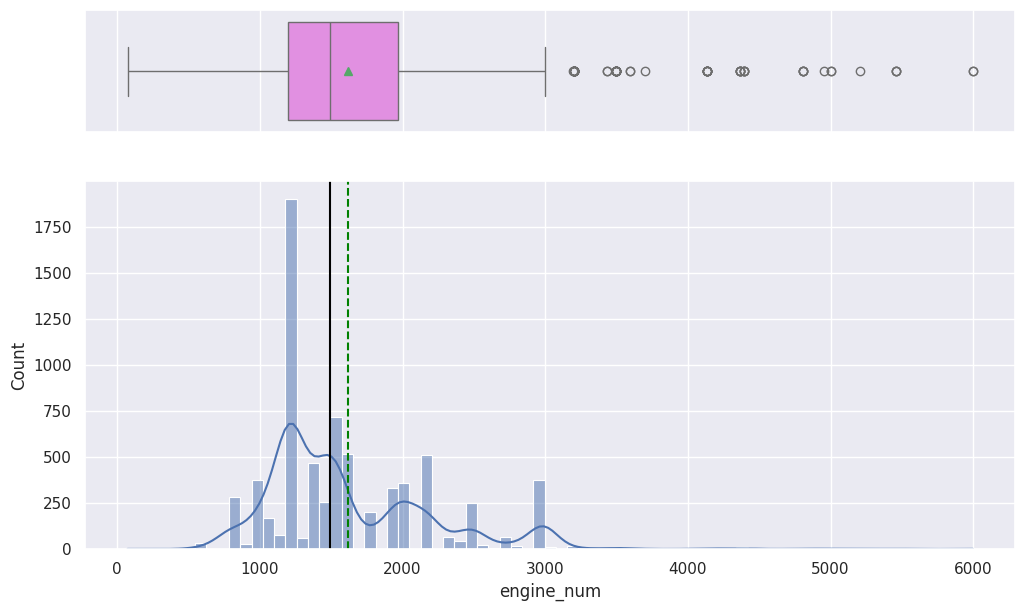

In [ ]:
histogram_boxplot(df1, "engine_num", kde=True)

**Observations**

* There are a few car with a higher engine displacement volume.

#### `power_num`

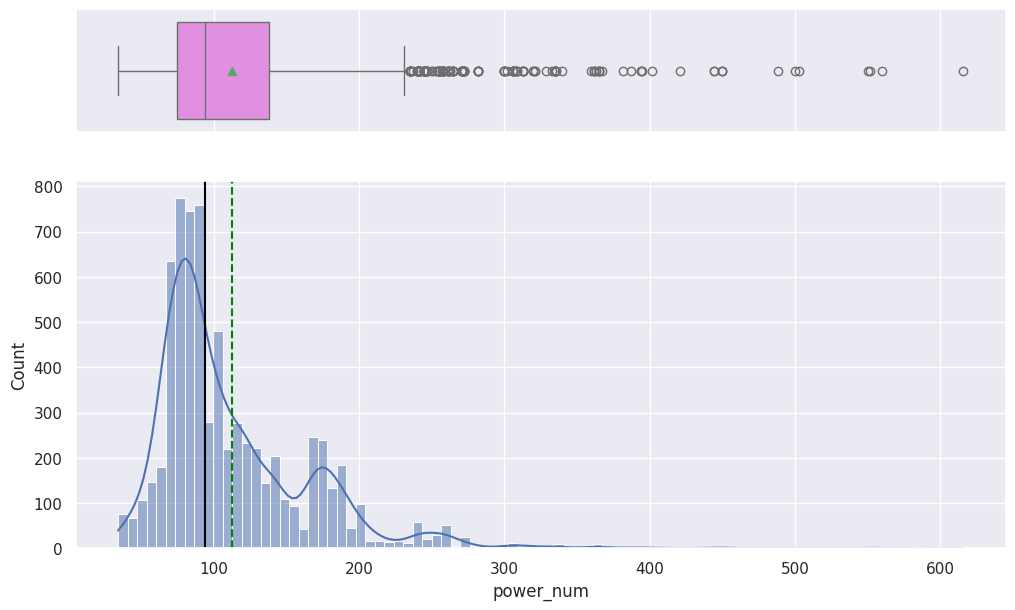

In [ ]:
histogram_boxplot(df1, "power_num", kde=True)

**Observations**

* There are a few car with a higher engine power.

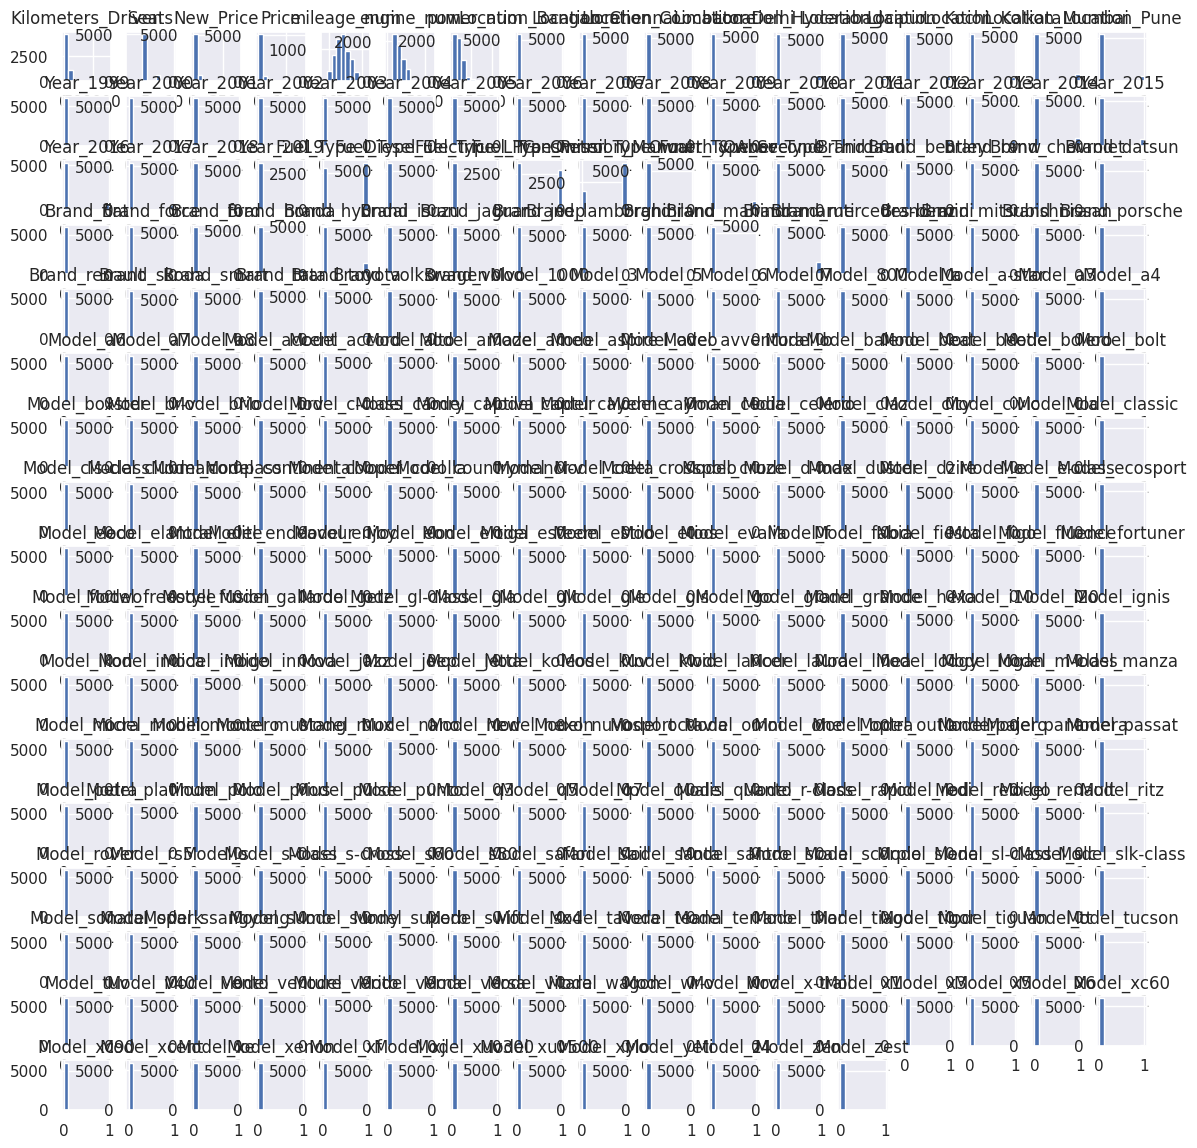

In [ ]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

- `Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 53.5 lakh INR. The log transformation was applied on this column to reduce skewness. The displacement volume of the engine, the maximum power of the engine and the price of a new car of the same model is highly correlated with the price of a used car.
- `Mileage`: This attribute has a close to normally distribution. With increase in mileage, the engine displacement and power decrease.
- `Engine`: There are a few upper outliers, indicating that there are a few car with a higher engine displacement volume. Higher priced cars have higher engine displacement. It is also highly correlated with the maximum engine power.
- `Power`: There are a few upper outliers, indicating that there are a few car with a higher power. Higher priced cars have higher maximum power. It is also highly correlated with the engine displacement volume.
- `Kilometers_driven`: The number of kilometers a used car is driven has a highly skewed distribution, with a median value of around 53.5 thousand. The log transformation was applied on this column to reduce skewness.
- `New_Price`: The price of a used car is the target variable and has a highly skewed distribution, with a median value of around 11.3 lakh INR. The log transformation was applied on this column to reduce skewness.
- `Seats`: 84% of the cars in the dataset are 5-seater cars.
- `Year`: More than half the cars in the data were manufactured in or after 2014. The price of used cars has increased over the years.
- `Brand`: Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc.
- `Model`: Maruti Swift is the most common car up for resale. The dataset contains used cars from luxury as well as budget-friendly brands.
- `Location`: Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.
- `Fuel_Type`: Around 1% of the cars in the dataset do not run on diesel or petrol. Electric cars have the highest median price, followed by diesel cars.
- `Transmission`: More than 70% of the cars have manual transmission. The price is higher for used cars with automatic transmission.
- `Owner_Type`: More than 80% of the used cars are being sold for the first time. The price of cars decreases as they keep getting resold.

#### `Model`

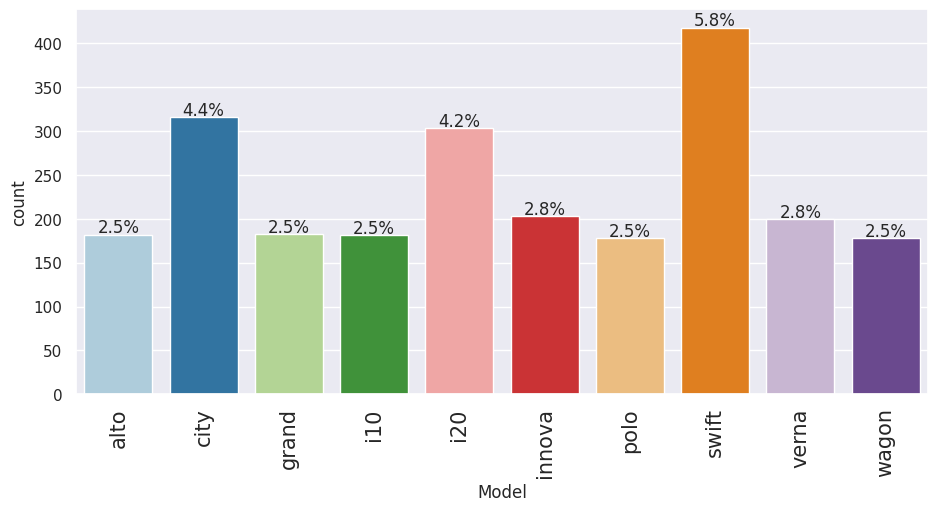

In [ ]:
labeled_barplot(df1, "Model", perc=True, n=10)

**Observations**

* Maruti Swift is the most common car up for resale.

* It is clear from the above charts that our dataset contains used cars from luxury as well as budget-friendly brands.

* We can create a new variable using this information. We can consider binning all our cars into the following 3 categories later:

    1. Budget-Friendly
    2. Mid Range
    3. Luxury Cars

#### `Seats`

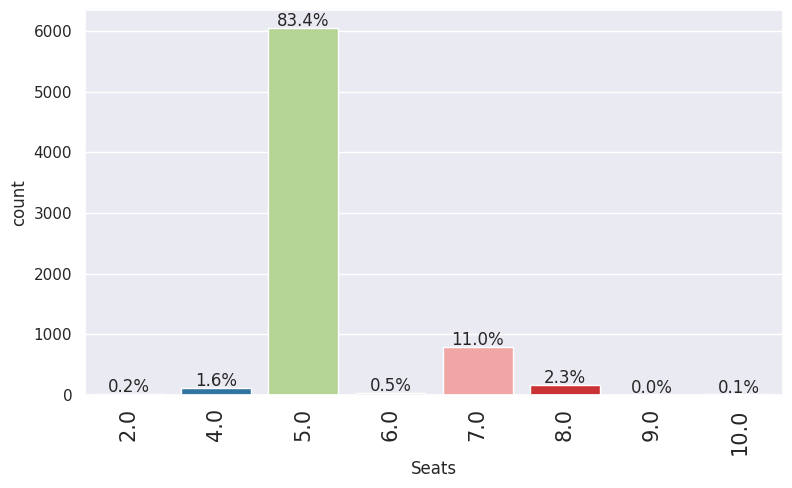

In [ ]:
labeled_barplot(df1, "Seats", perc=True)

* 84% of the cars in the dataset are 5-seater cars.

#### `Year`

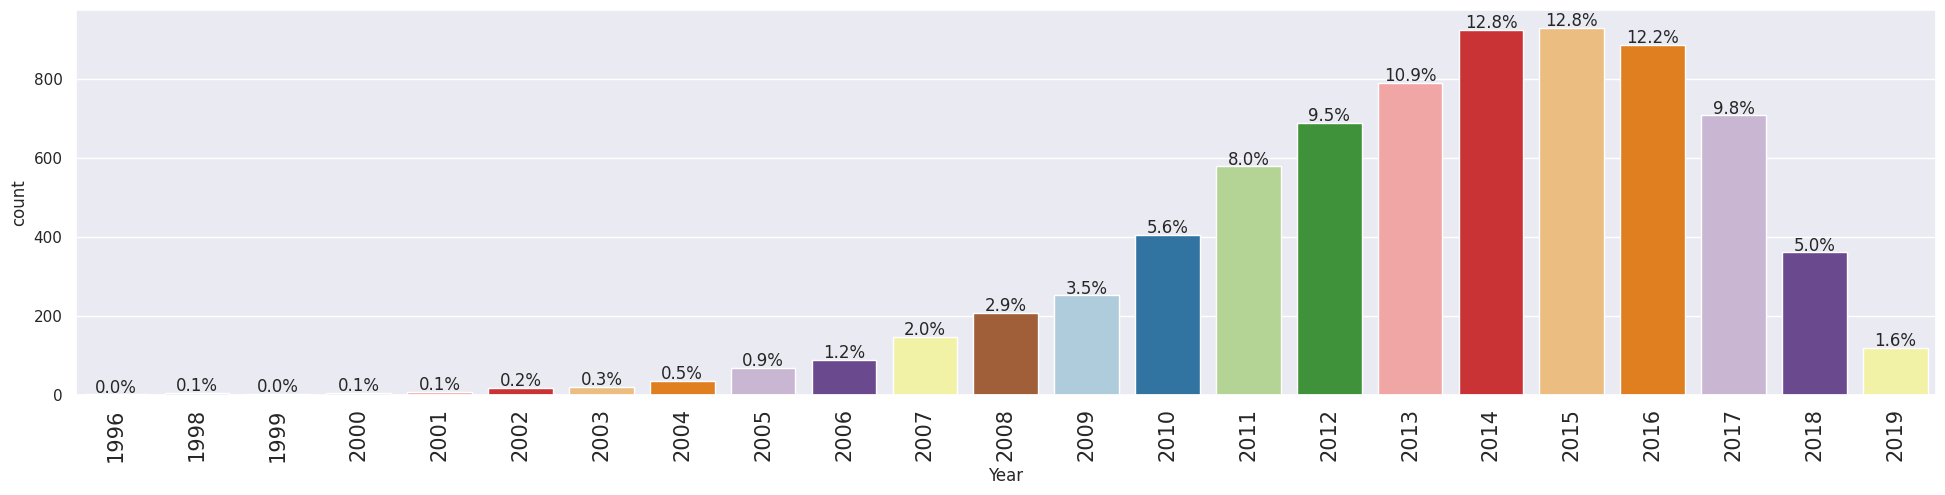

In [ ]:
labeled_barplot(df1, "Year", perc=True)

* More than half the cars in the data were manufactured in or after 2014.

#### `Transmission`

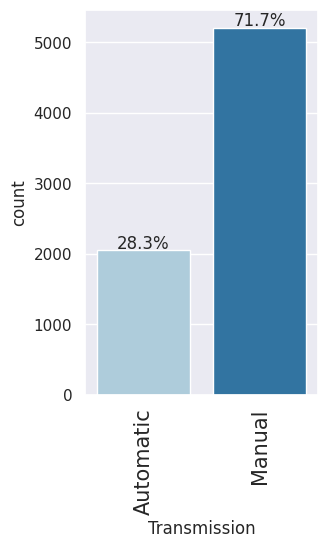

In [ ]:
labeled_barplot(df1, "Transmission", perc=True)

* More than 70% of the cars have manual transmission.

#### `Owner_Type`

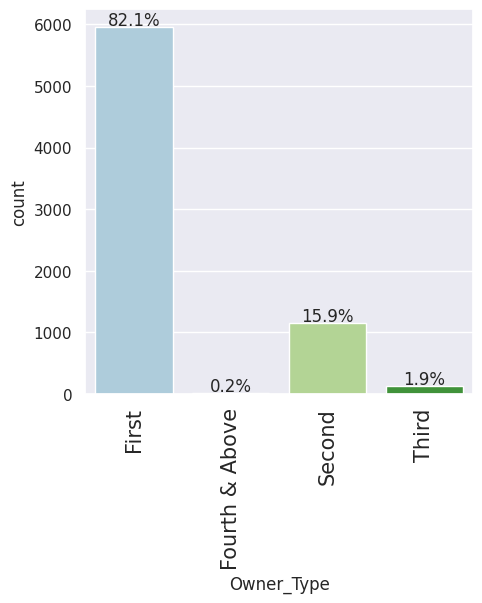

In [ ]:
labeled_barplot(df1, "Owner_Type", perc=True)

* More than 80% of the used cars are being sold for the first time.

### Bivariate Analysis

**Let's check the variation in Price with some of the other variables.**

#### `Price` vs `Transmission`

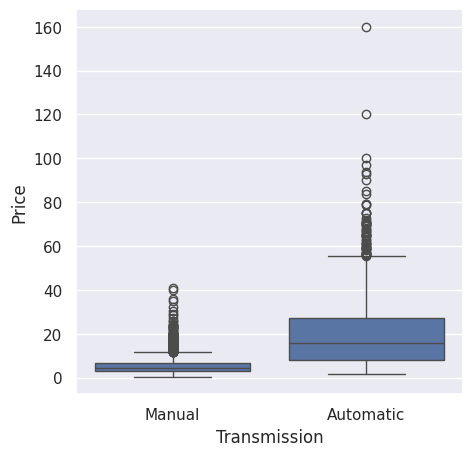

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df1)
plt.show()

* The price is higher for used cars with automatic transmission.

#### `Price` vs `Fuel_Type`

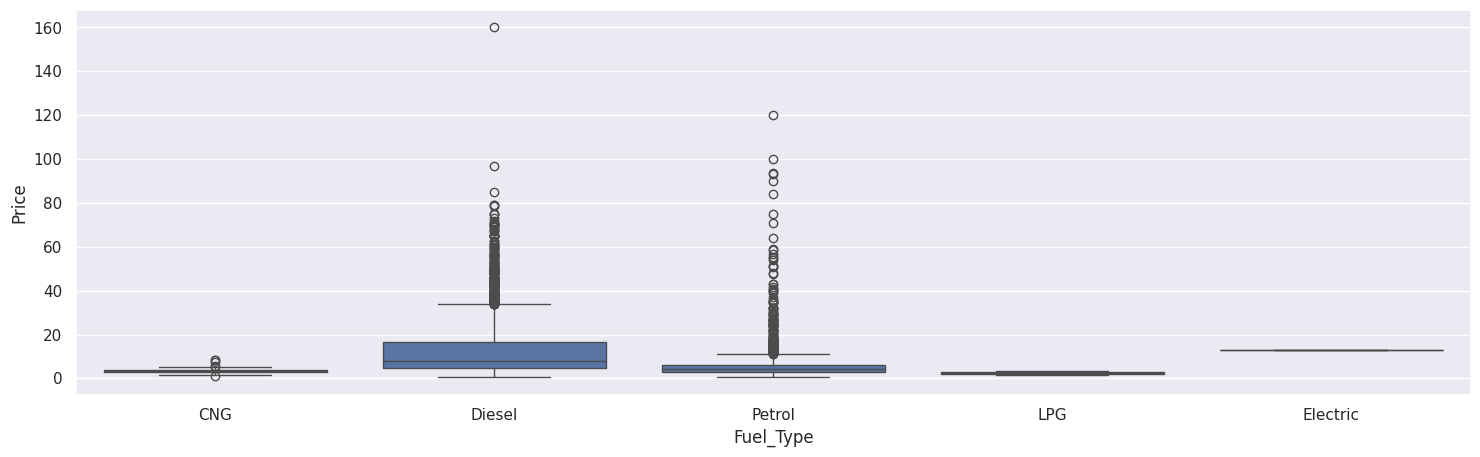

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

#### `Price` vs `Brand`

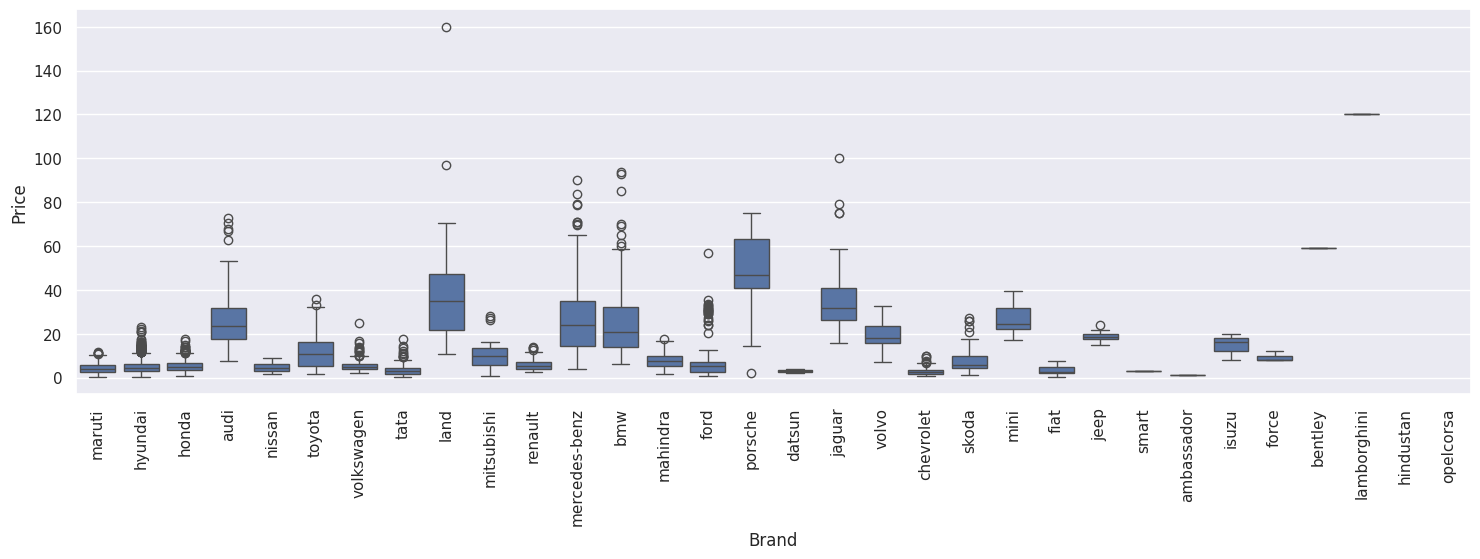

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1)
plt.xticks(rotation=90)
plt.show()

* The price of used cars is lower for budget brands like Maruti, Tata, Fiat, etc.
* The price of used cars is higher for premium brands like Porsche, Audi, Lamborghini, etc.

#### `Price` vs `Transmission`

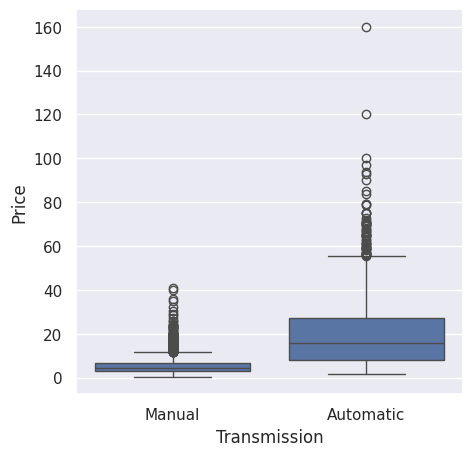

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df1)
plt.show()

* The price is higher for used cars with automatic transmission.

#### `Price` vs `Fuel_Type`

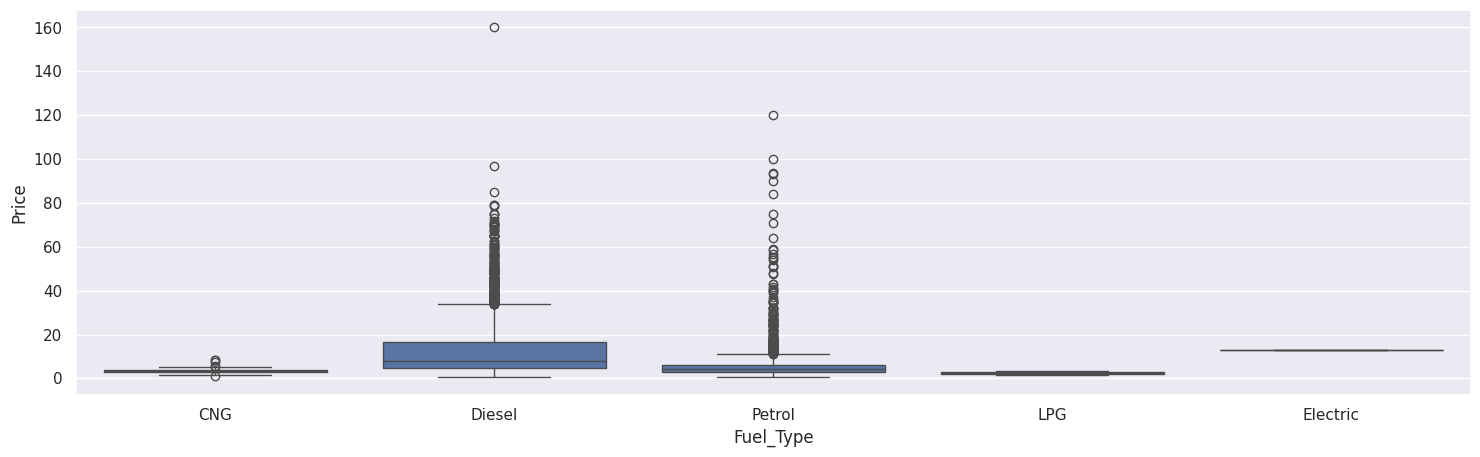

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)
plt.show()

* Electric cars have the highest median price, followed by diesel cars.

#### `Price` vs `Owner_Type`

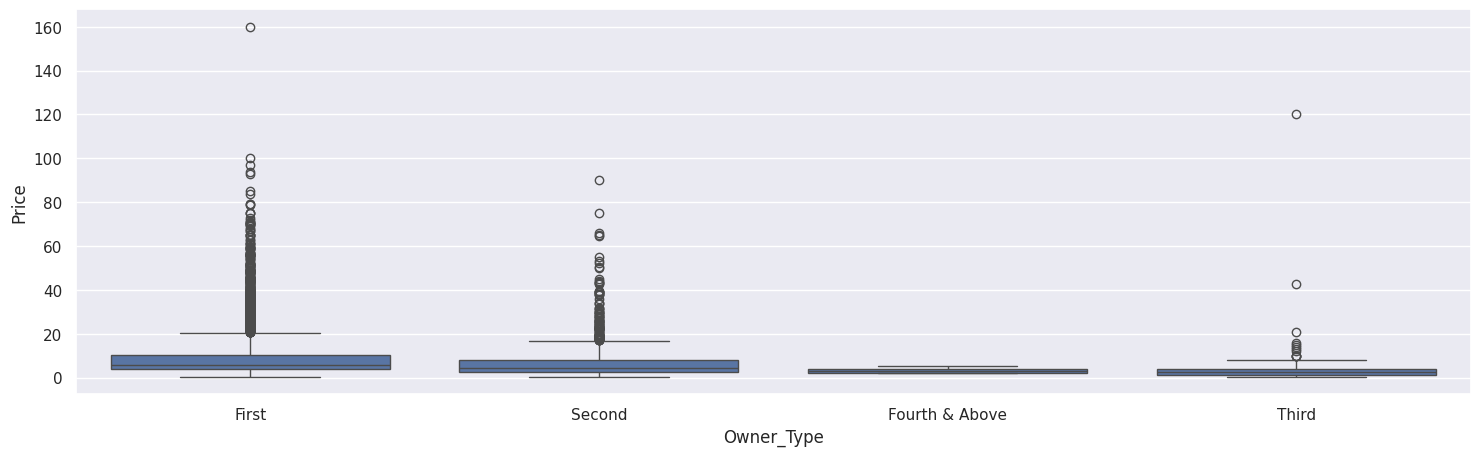

In [ ]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df1)
plt.show()

* The price of cars decreases as they keep getting resold.

#### Pairplot for relations between numerical variables

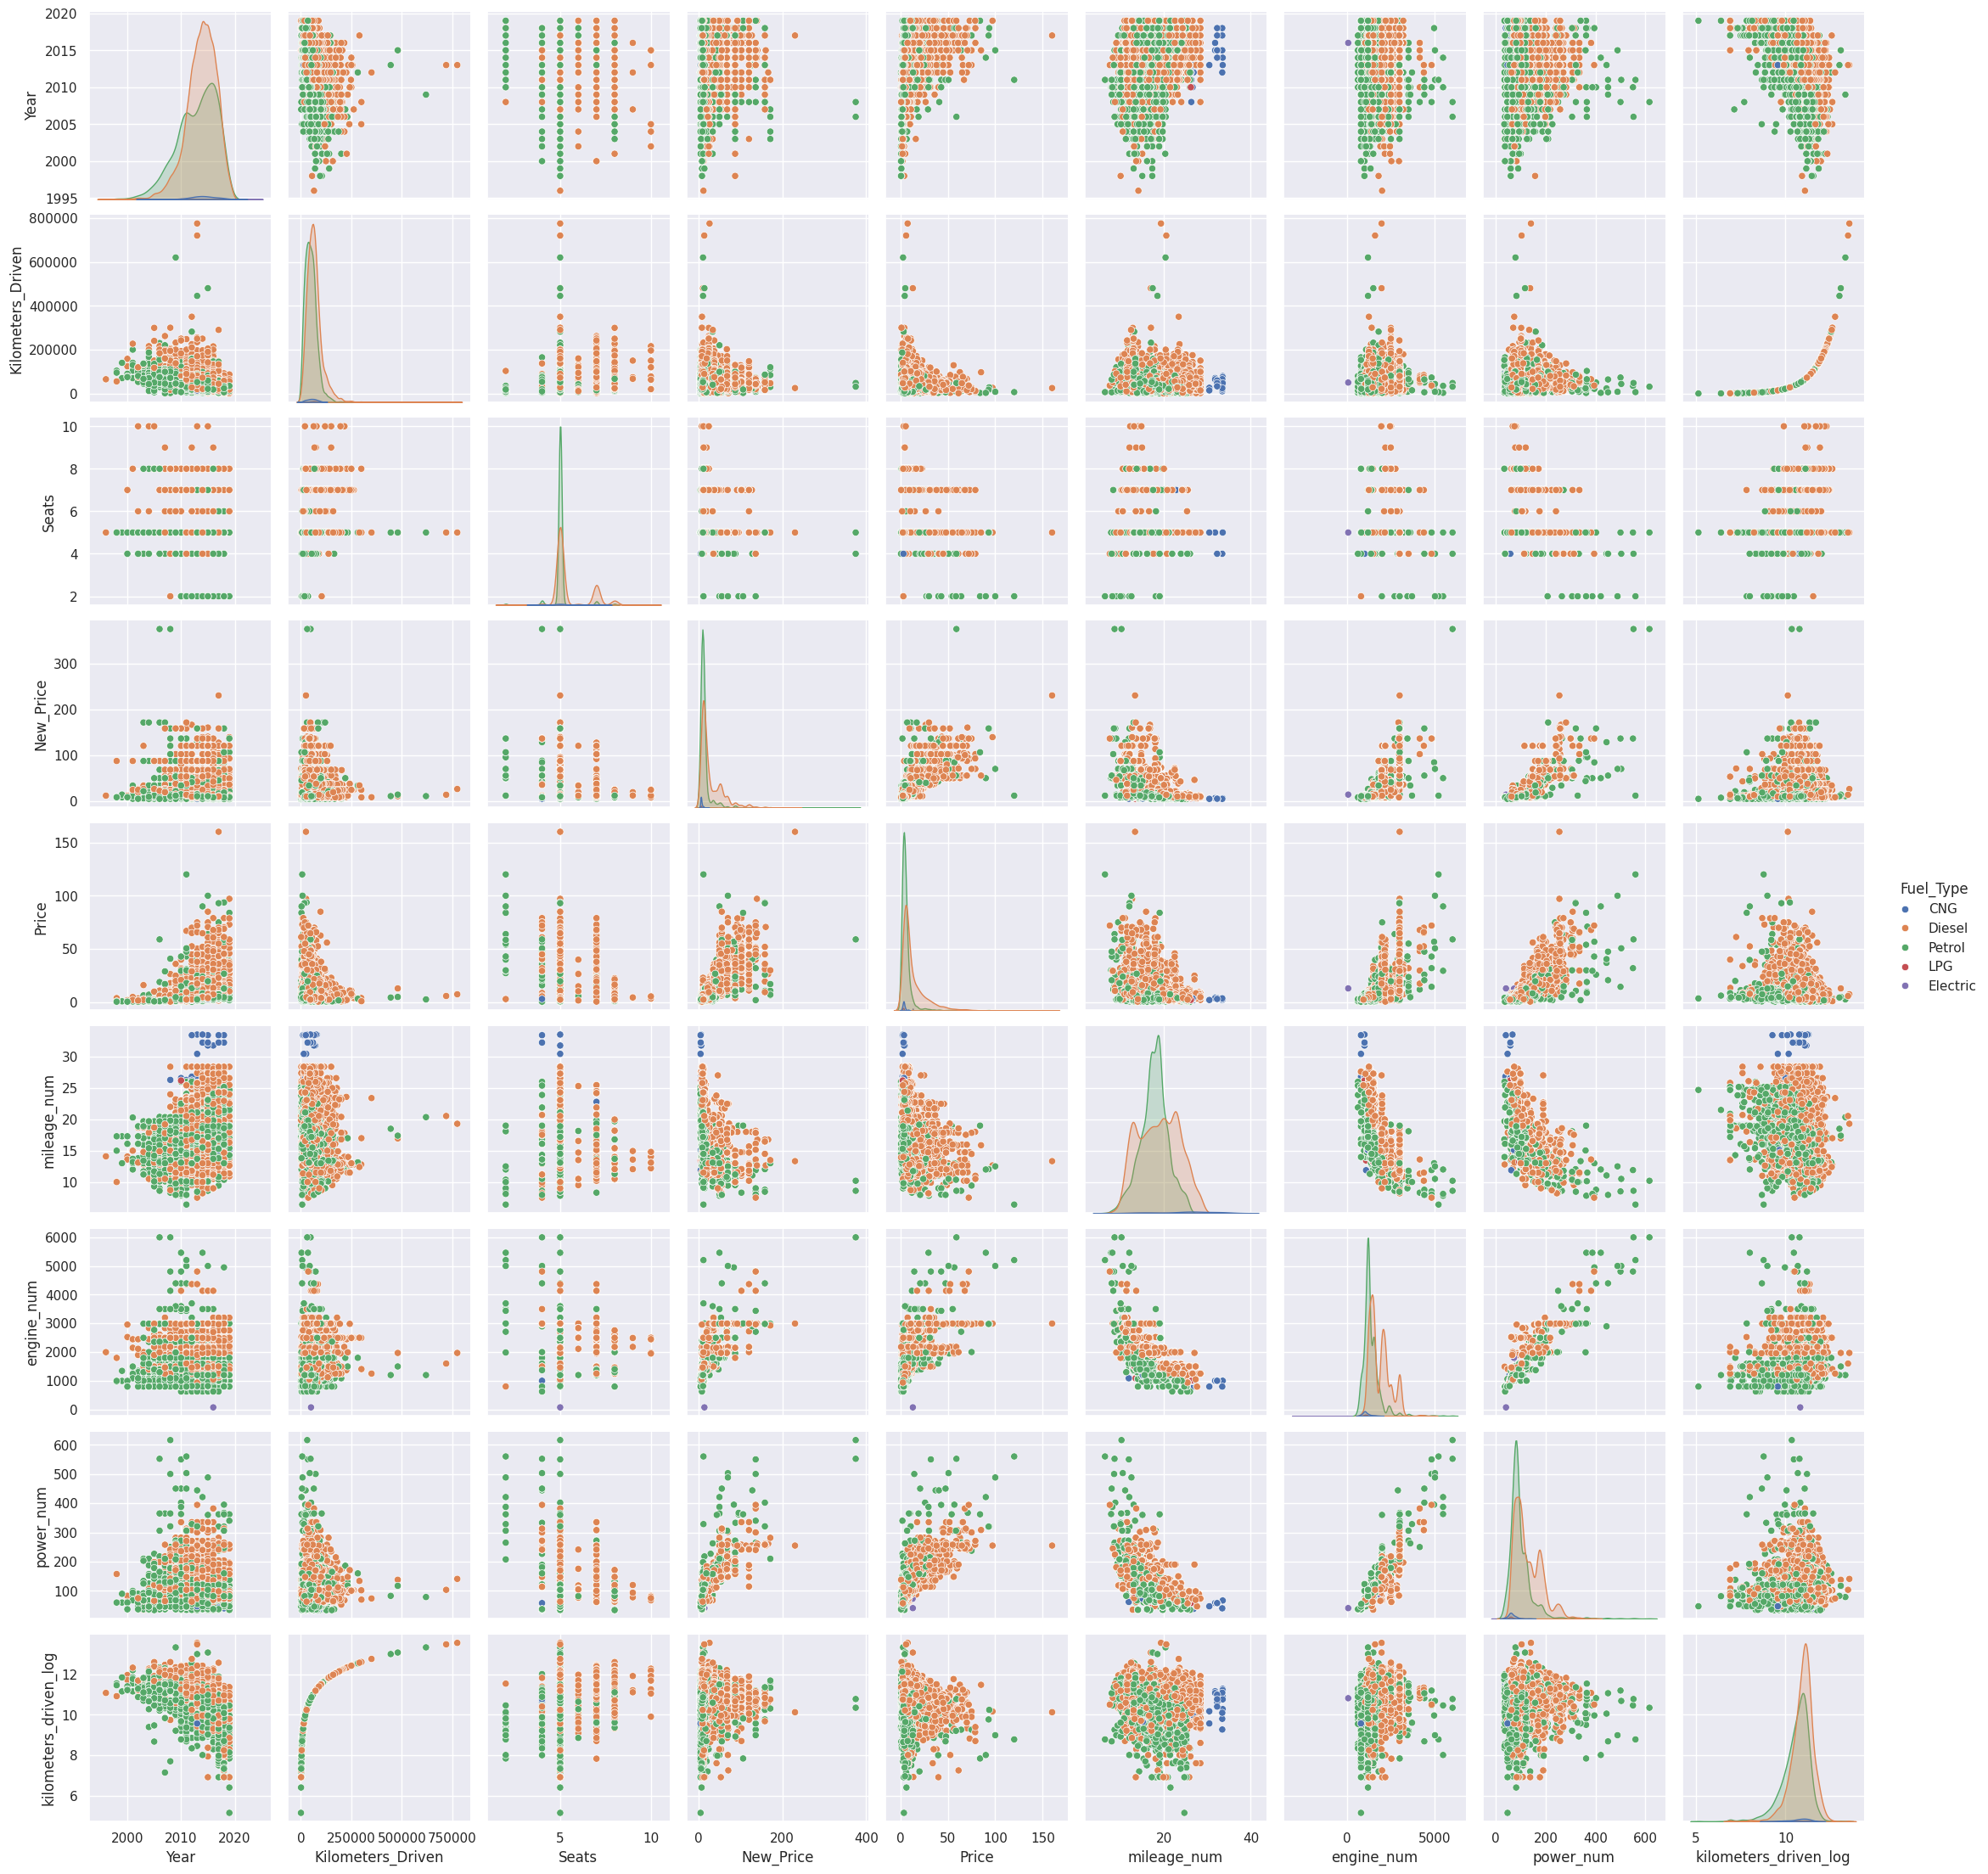

In [ ]:
sns.pairplot(data=df1, hue="Fuel_Type")
plt.show()


Zooming into these plots gives us a lot of information.

- Contrary to intuition, `Kilometers_Driven` does not seem to have a relationship with the price.
- `Price` has a positive relationship with `Year`, i.e., the newer the car, the higher the price.
    - The temporal element of variation is captured in the year column.

- 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
- Mileage does not seem to show much relationship with the price of used cars.
- Engine displacement and power of the car have a positive relationship with the price.
- `New_Price` and used car price are also positively correlated, which is expected.
- `Kilometers_Driven` has a peculiar relationship with the `Year` variable. Generally, the newer the car lesser the distance it has traveled, but this is not always true.
- CNG cars are conspicuous outliers when it comes to `Mileage`. The mileage of these cars is very high.
- The mileage and power of newer cars are increasing owing to advancements in technology.
- Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.